In [1]:
# installeren van libraries
#!pip install gpxpy

In [26]:
# libraries
import gpxpy
import gpxpy.gpx
import os
import sys
import pandas as pd
import re
import numpy as np


In [3]:
sys.path.append('C:/Users/michel.marien_icarew/Documents/GitHub/Machine-learning')
import MachineLearning_helpfuncties as Mhelp

In [4]:
# importeren van garmin bestanden
dict_fit = Mhelp.import_fit('/activities')
dict_gpx = Mhelp.import_gpx('/activities')
dict_tcx = Mhelp.import_tcx('/activities')
dict_json_details = Mhelp.import_details_json('/activities')
dict_json_summ = Mhelp.import_summary_json('/activities')

In [5]:
dict_fit_keys = list(dict_fit.keys())
dict_fit[dict_fit_keys[0]].dtypes

altitude                     float64
cadence                        int64
distance                     float64
enhanced_altitude            float64
enhanced_speed               float64
fractional_cadence           float64
heart_rate                     int64
position_lat                   int64
position_long                  int64
speed                        float64
timestamp             datetime64[ns]
unknown_87                     int64
unknown_88                     int64
dtype: object

In [6]:
dict_gpx_keys = list(dict_gpx.keys())
dict_gpx[dict_gpx_keys[0]].dtypes

type                                object
latitude                           float64
longitude                          float64
elevation                          float64
time         datetime64[ns, SimpleTZ('Z')]
dtype: object

In [7]:
dict_tcx_keys = list(dict_tcx.keys())
dict_tcx[dict_tcx_keys[0]].dtypes

time           object
latitude      float64
longitude     float64
elevation     float64
heart_rate      int64
cadence        object
speed          object
distance      float64
power          object
dtype: object

In [8]:
dict_json_details_keys = list(dict_json_details.keys())
dict_json_details[dict_json_details_keys[0]].dtypes

activityId                                               int64
measurementCount                                         int64
metricsCount                                             int64
metricDescriptors                                       object
activityDetailMetrics                                   object
heartRateDTOs                                           object
pendingData                                             object
detailsAvailable                                          bool
geoPolylineDTO.startPoint.lat                          float64
geoPolylineDTO.startPoint.lon                          float64
geoPolylineDTO.startPoint.altitude                      object
geoPolylineDTO.startPoint.time                           int64
geoPolylineDTO.startPoint.timerStart                      bool
geoPolylineDTO.startPoint.timerStop                       bool
geoPolylineDTO.startPoint.distanceFromPreviousPoint     object
geoPolylineDTO.startPoint.distanceInMeters             

In [39]:
dict_json_details = Mhelp.import_details_json('/activities')
def flatten_track_info(json_dict):
    
    lst_flattened_tracks = []
    
    lst_tracks = list(json_dict.keys())

    for track in lst_tracks:

        #print(track)

        df_track = pd.DataFrame.from_dict(json_dict[track])

        print(track, 'geoPolylineDTO: ','geoPolylineDTO.polyline' in df_track.columns, 
              'metricDescriptors: ','metricDescriptors' in df_track.columns,
              'detailsAvailable: ',df_track['detailsAvailable'][0]
              )


df_test = flatten_track_info(dict_json_details)

2020-08-04T15_04_21 geoPolylineDTO:  True metricDescriptors:  True detailsAvailable:  True
2020-08-05T15_19_00 geoPolylineDTO:  True metricDescriptors:  True detailsAvailable:  True
2020-08-07T15_15_18 geoPolylineDTO:  True metricDescriptors:  True detailsAvailable:  True
2020-08-27T14_47_53 geoPolylineDTO:  True metricDescriptors:  True detailsAvailable:  True
2020-09-17T12_04_18 geoPolylineDTO:  True metricDescriptors:  True detailsAvailable:  True
2020-10-01T14_06_48 geoPolylineDTO:  True metricDescriptors:  True detailsAvailable:  True
2020-10-13T14_27_54 geoPolylineDTO:  True metricDescriptors:  True detailsAvailable:  True
2020-10-20T14_39_56 geoPolylineDTO:  True metricDescriptors:  True detailsAvailable:  True
2020-10-28T15_09_33 geoPolylineDTO:  True metricDescriptors:  True detailsAvailable:  True
2020-11-04T15_14_38 geoPolylineDTO:  True metricDescriptors:  True detailsAvailable:  True
2020-11-10T16_21_29 geoPolylineDTO:  True metricDescriptors:  True detailsAvailable:  True

In [38]:
dict_json_details.keys()

dict_keys(['2020-08-04T15_04_21', '2020-08-05T15_19_00', '2020-08-07T15_15_18', '2020-08-27T14_47_53', '2020-09-17T12_04_18', '2020-10-01T14_06_48', '2020-10-13T14_27_54', '2020-10-20T14_39_56', '2020-10-28T15_09_33', '2020-11-04T15_14_38', '2020-11-10T16_21_29', '2020-11-17T16_26_07', '2020-11-19T16_24_58', '2020-12-08T10_50_46', '2020-12-24T09_12_34', '2020-12-24T13_06_19', '2020-12-26T07_54_05', '2020-12-28T12_11_56', '2020-12-31T13_48_05', '2021-01-04T15_04_58', '2021-01-09T15_10_23', '2021-01-11T16_01_45', '2021-01-17T12_24_08', '2021-01-27T15_30_48', '2021-02-02T15_12_18', '2021-02-24T14_11_45', '2021-03-10T13_50_46', '2021-03-26T09_30_19', '2021-03-30T14_32_14', '2021-04-07T13_53_00', '2021-04-13T14_45_02', '2021-04-28T13_49_25', '2021-05-01T14_52_18', '2021-05-01T15_04_58', '2021-05-01T15_32_56', '2021-05-11T09_14_51', '2021-05-18T14_18_20', '2021-05-18T14_41_42', '2021-05-30T08_56_23', '2021-06-06T07_40_39', '2021-06-13T06_02_07', '2021-07-04T08_59_48', '2021-07-12T06_12_45', 

In [250]:
csv_path = os.path.join('C:/Users/michel.marien_icarew/Documents/GitHub/Machine-learning/docs/', 'Garmin_activity_description.csv')

drop_cols = ['Activiteittype', 'Favoriet', 'CalorieÃ«n','Decompressie','Training Stress ScoreÂ®',
             'Beste rondetijd', 'Aantal ronden','Minimum hoogte', 'Maximum hoogte','Normalized PowerÂ® (NPÂ®)',
             'Gem. staplengte','Gemiddelde verticale ratio', 'Gem. verticale oscillatie' ,'Training effect aeroob',
             'Beste tempo', 'Verstreken tijd', 'Gem. grondcontacttijd', 'Tijd','Gem. GAP','Gem. loopcadans', 
            'Max. loopcadans',]

drop_cols_backup = ['Activiteittype', 'Datum', 'Favoriet', 'Titel', 'Afstand', 'CalorieÃ«n',
       'Tijd', 'Gem. HS', 'Max. HS', 'Training effect aeroob',
       'Gem. loopcadans', 'Max. loopcadans', 'Gemiddeld tempo', 'Beste tempo',
       'Totale stijging', 'Totale daling', 'Gem. staplengte',
       'Gemiddelde verticale ratio', 'Gem. verticale oscillatie',
       'Gem. grondcontacttijd', 'Gem. GAP', 'Normalized PowerÂ® (NPÂ®)',
       'Training Stress ScoreÂ®', 'Gem. vermogen', 'Max. vermogen',
       'Decompressie', 'Beste rondetijd', 'Aantal ronden', 'Tijd bewogen',
       'Verstreken tijd', 'Minimum hoogte', 'Maximum hoogte', 'track_lengths']

def import_garmin_summ_csv(csv_path):    

    with open(csv_path, 'r') as csv_file:
        garmin_activities_csv = pd.read_csv(csv_file,
                                        sep=';',
                                        encoding='utf-8')
        
    return garmin_activities_csv

# Create groupings of track distances
def categorize_distance(distance):
    if distance < 8:                # tracks shorter than 8 km
        return '8'
    elif distance < 12:             # tracks shorter than 12 km
        return '12'
    elif distance < 20:             # tracks shorter than 20 km
        return '20'
    else:
        return '100'               # failsafe group


def prep_garmin_summ (csv_path,cols_to_drop):

    garmin_activities_csv = import_garmin_summ_csv(csv_path)

    # Round 'Afstand' to nearest kilometer
    garmin_activities_csv['Afstand'] = garmin_activities_csv['Afstand'].round(0)  

    garmin_activities_csv['track_lengths'] = garmin_activities_csv['Afstand'].apply(categorize_distance)

    garmin_activities_prep = garmin_activities_csv.loc[garmin_activities_csv['Activiteittype'] == 'Hardlopen']
    
    # Remove 'hardlopen' (case insensitive) from Titel column
    garmin_activities_prep['Titel'] = garmin_activities_prep['Titel'].str.replace('hardlopen', '', case=False).str.strip()

    # Remove any potential double spaces that might have been created
    garmin_activities_prep['Titel'] = garmin_activities_prep['Titel'].str.replace('  ', ' ')

    garmin_activities_prep = garmin_activities_prep[garmin_activities_prep.groupby('Titel')['Titel'].transform('count') > 2]
    
    garmin_activities_prep = garmin_activities_prep.drop(cols_to_drop,axis=1)

    garmin_activities_prep.replace("--", np.nan, inplace=True)

    # Create dummy variables for 'Titel'
    #garmin_activities_prep = pd.concat([garmin_activities_prep, pd.get_dummies(garmin_activities_prep['Titel'], prefix='titel')], axis=1)
    #garmin_activities_prep.drop('Titel', axis=1, inplace=True)

    # Convert numeric text columns to float
    numeric_columns = [
        'Gem. HS', 'Max. HS',  'Totale stijging', 'Totale daling',
        'Gem. vermogen', 'Max. vermogen'
    ]
    for col in numeric_columns:
        garmin_activities_prep[col] = garmin_activities_prep[col].apply(lambda x: float(str(x).replace(',', '.').strip()))

    return garmin_activities_prep

garmin_activities_prep = prep_garmin_summ(csv_path, drop_cols)

garmin_activities_prep

Datum                   Titel  Afstand  Gem. HS  Max. HS  \
0    20-12-2024 15:38                  Waalre     12.0    172.0    183.0   
1    12-12-2024 13:54                  Waalre     11.0    178.0    186.0   
2     3-12-2024 15:56            Loon op Zand     10.0    173.0    183.0   
3    26-11-2024 15:56            Loon op Zand     10.0    176.0    188.0   
4    19-11-2024 16:06            Loon op Zand     10.0    182.0    191.0   
..                ...                     ...      ...      ...      ...   
221   10-9-2020 12:35                  Waalre     13.0    180.0    191.0   
222   27-8-2020 16:47            Heeze-Leende     11.0    179.0    192.0   
223    7-8-2020 17:15  Bad Lauterberg im Harz      5.0    165.0    182.0   
224    5-8-2020 17:19  Bad Lauterberg im Harz      6.0    157.0    174.0   
225    4-8-2020 17:04  Bad Lauterberg im Harz      6.0    159.0    176.0   

    Gemiddeld tempo  Totale stijging  Totale daling  Gem. vermogen  \
0             05:22             13.0           25.0          370.0   
1             05:28             15.0           23.0          357.0   
2             05:41             31.0           34.0          346.0   
3             05:50             35.0           36.0          338.0   
4             05:58             33.0           38.0          333.0   
..              ...              ...            ...            ...   
221           05:46             27.0           11.0            NaN   
222           06:04             14.0            4.0            NaN   
223           06:09             89.0           44.0            NaN   
224           06:11             80.0           67.0            NaN   
225           06:09             86.0           82.0            NaN   

     Max. vermogen Tijd bewogen track_lengths  
0            460.0     01:01:59            20  
1            458.0     01:02:40            12  
2            570.0     00:57:12            12  
3            521.0     01:00:02            12  
4            513.0     00:58:51            12  
..             ...          ...           ...  
221            NaN     01:12:09            20  
222            NaN     01:08:19            12  
223            NaN     00:31:05             8  
224            NaN     00:34:12             8  
225            NaN     00:34:45             8  

[200 rows x 12 columns]

In [228]:
garmin_activities_prep.dtypes


Titel                    object
Afstand                 float64
Gem. HS                 float64
Max. HS                 float64
Gemiddeld tempo         float64
Totale stijging         float64
Totale daling           float64
Gem. vermogen           float64
Max. vermogen           float64
Tijd bewogen             object
track_lengths            object
Titel_Track              object
Gemiddeld tempo_km/h    float64
Titel_Numeric             int64
new_track                object
dtype: object

In [219]:
## import additional features

add_features_path = os.path.join('C:/Users/michel.marien_icarew/Documents/GitHub/Machine-learning/docs/', 'Additional_features.csv')

def import_garmin_summ_csv(add_features_path):    

    with open(add_features_path , 'r') as csv_file:
        addfeatures_csv = pd.read_csv(csv_file,
                                        sep=';',
                                        encoding='utf-8')
        
    addfeatures_csv =addfeatures_csv.rename(columns={'ï»¿datum': 'datum'})

    num_cols = ['afstand', 'addfeat_asphalt', 'addfeat_forest', 'addfeat_dunes','addfeat_temp','addfeat_windsp','addfeat_humid']   

    for col in num_cols:
        addfeatures_csv[col] = pd.to_numeric(addfeatures_csv[col])
    
        
    return addfeatures_csv

garmin_activities_addfeatures = import_garmin_summ_csv(add_features_path)
garmin_activities_addfeatures.dtypes

datum               object
plaats              object
afstand            float64
addfeat_asphalt    float64
addfeat_forest     float64
addfeat_dunes      float64
addfeat_temp       float64
addfeat_sky         object
addfeat_windsp       int64
addfeat_winddir     object
addfeat_humid      float64
dtype: object

In [151]:
def convert_duration_to_seconds(df, duration_columns):
    for col in duration_columns:
        df[col] = pd.to_timedelta(df[col], errors='coerce').dt.total_seconds()
    return df

# Identify duration columns (replace with actual column names)
duration_columns = ['Tijd bewogen','Gemiddeld tempo']  # Update with your actual column names

# Convert duration columns to numeric
garmin_activities_prep = convert_duration_to_seconds(garmin_activities_prep, duration_columns)


In [150]:
aa = list(garmin_activities_prep['Titel'])
a=set(aa)

In [155]:
garmin_activities_prep['Gemiddeld tempo']

0      322.0
1      328.0
2      341.0
3      350.0
4      358.0
       ...  
221    346.0
222    364.0
223    369.0
224    371.0
225    369.0
Name: Gemiddeld tempo, Length: 206, dtype: float64

In [158]:
garmin_activities_prep['Gemiddeld tempo'] = pd.to_timedelta('00:' + garmin_activities_prep['Gemiddeld tempo'])

    # Extract total seconds from timedelta objects
garmin_activities_prep['Gemiddeld tempo'] = garmin_activities_prep['Gemiddeld tempo'].dt.total_seconds()

garmin_activities_prep['Gemiddeld tempo_km/h'] = 3600 / garmin_activities_prep['Gemiddeld tempo']


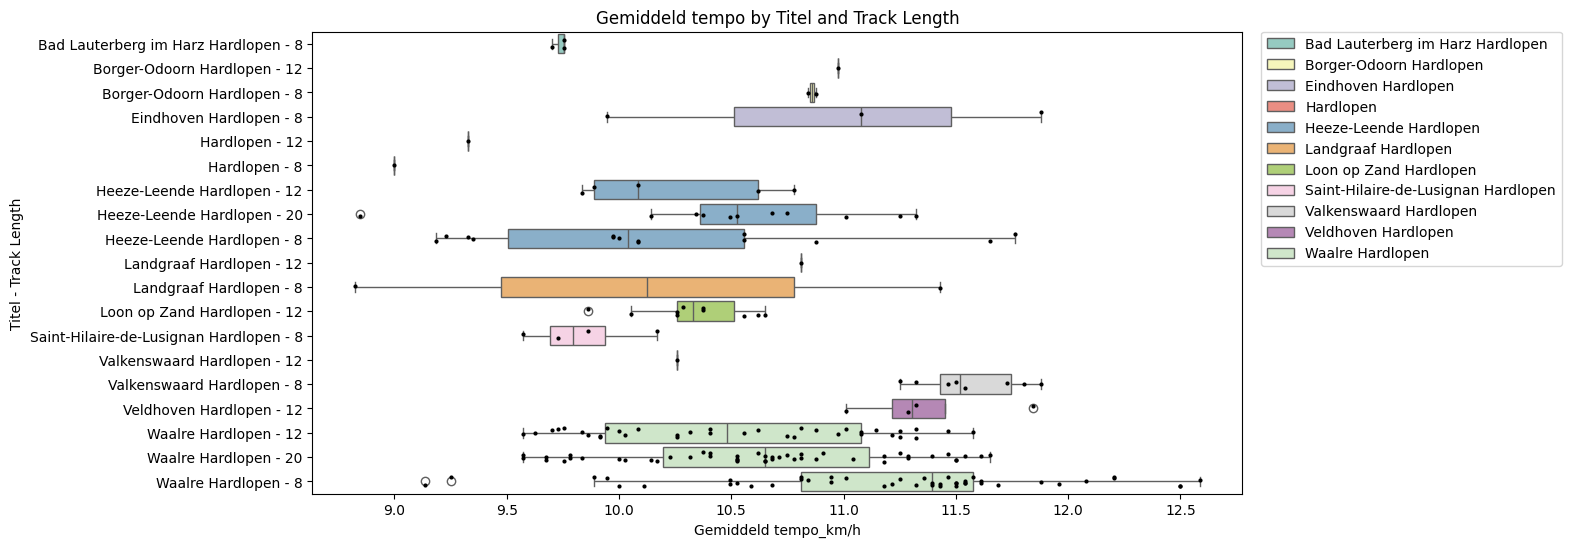

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_boxplot(df):
    # Create a new column combining 'Titel' and 'track_lengths'
    df['Titel_Track'] = df['Titel'] + ' - ' + df['track_lengths']

    # Sort the dataframe by 'Titel'
    df = df.sort_values(by=['Titel', 'Titel_Track'])

    # Create the box plot with 'Titel_Track' on the y-axis and 'Gemiddeld tempo' on the x-axis
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.boxplot(y='Titel_Track', x='Gemiddeld tempo_km/h', data=df, hue='Titel', palette="Set3", dodge=False)
    sns.stripplot(y='Titel_Track', x='Gemiddeld tempo_km/h', data=df, color='black', size=3, jitter=0.2, dodge=False)  # Add individual data points

    plt.title("Gemiddeld tempo by Titel and Track Length")
    plt.ylabel("Titel - Track Length")
    plt.xlabel('Gemiddeld tempo_km/h')
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0) 
    plt.show()

# Call the function with your preprocessed dataframe
plot_boxplot(garmin_activities_prep)

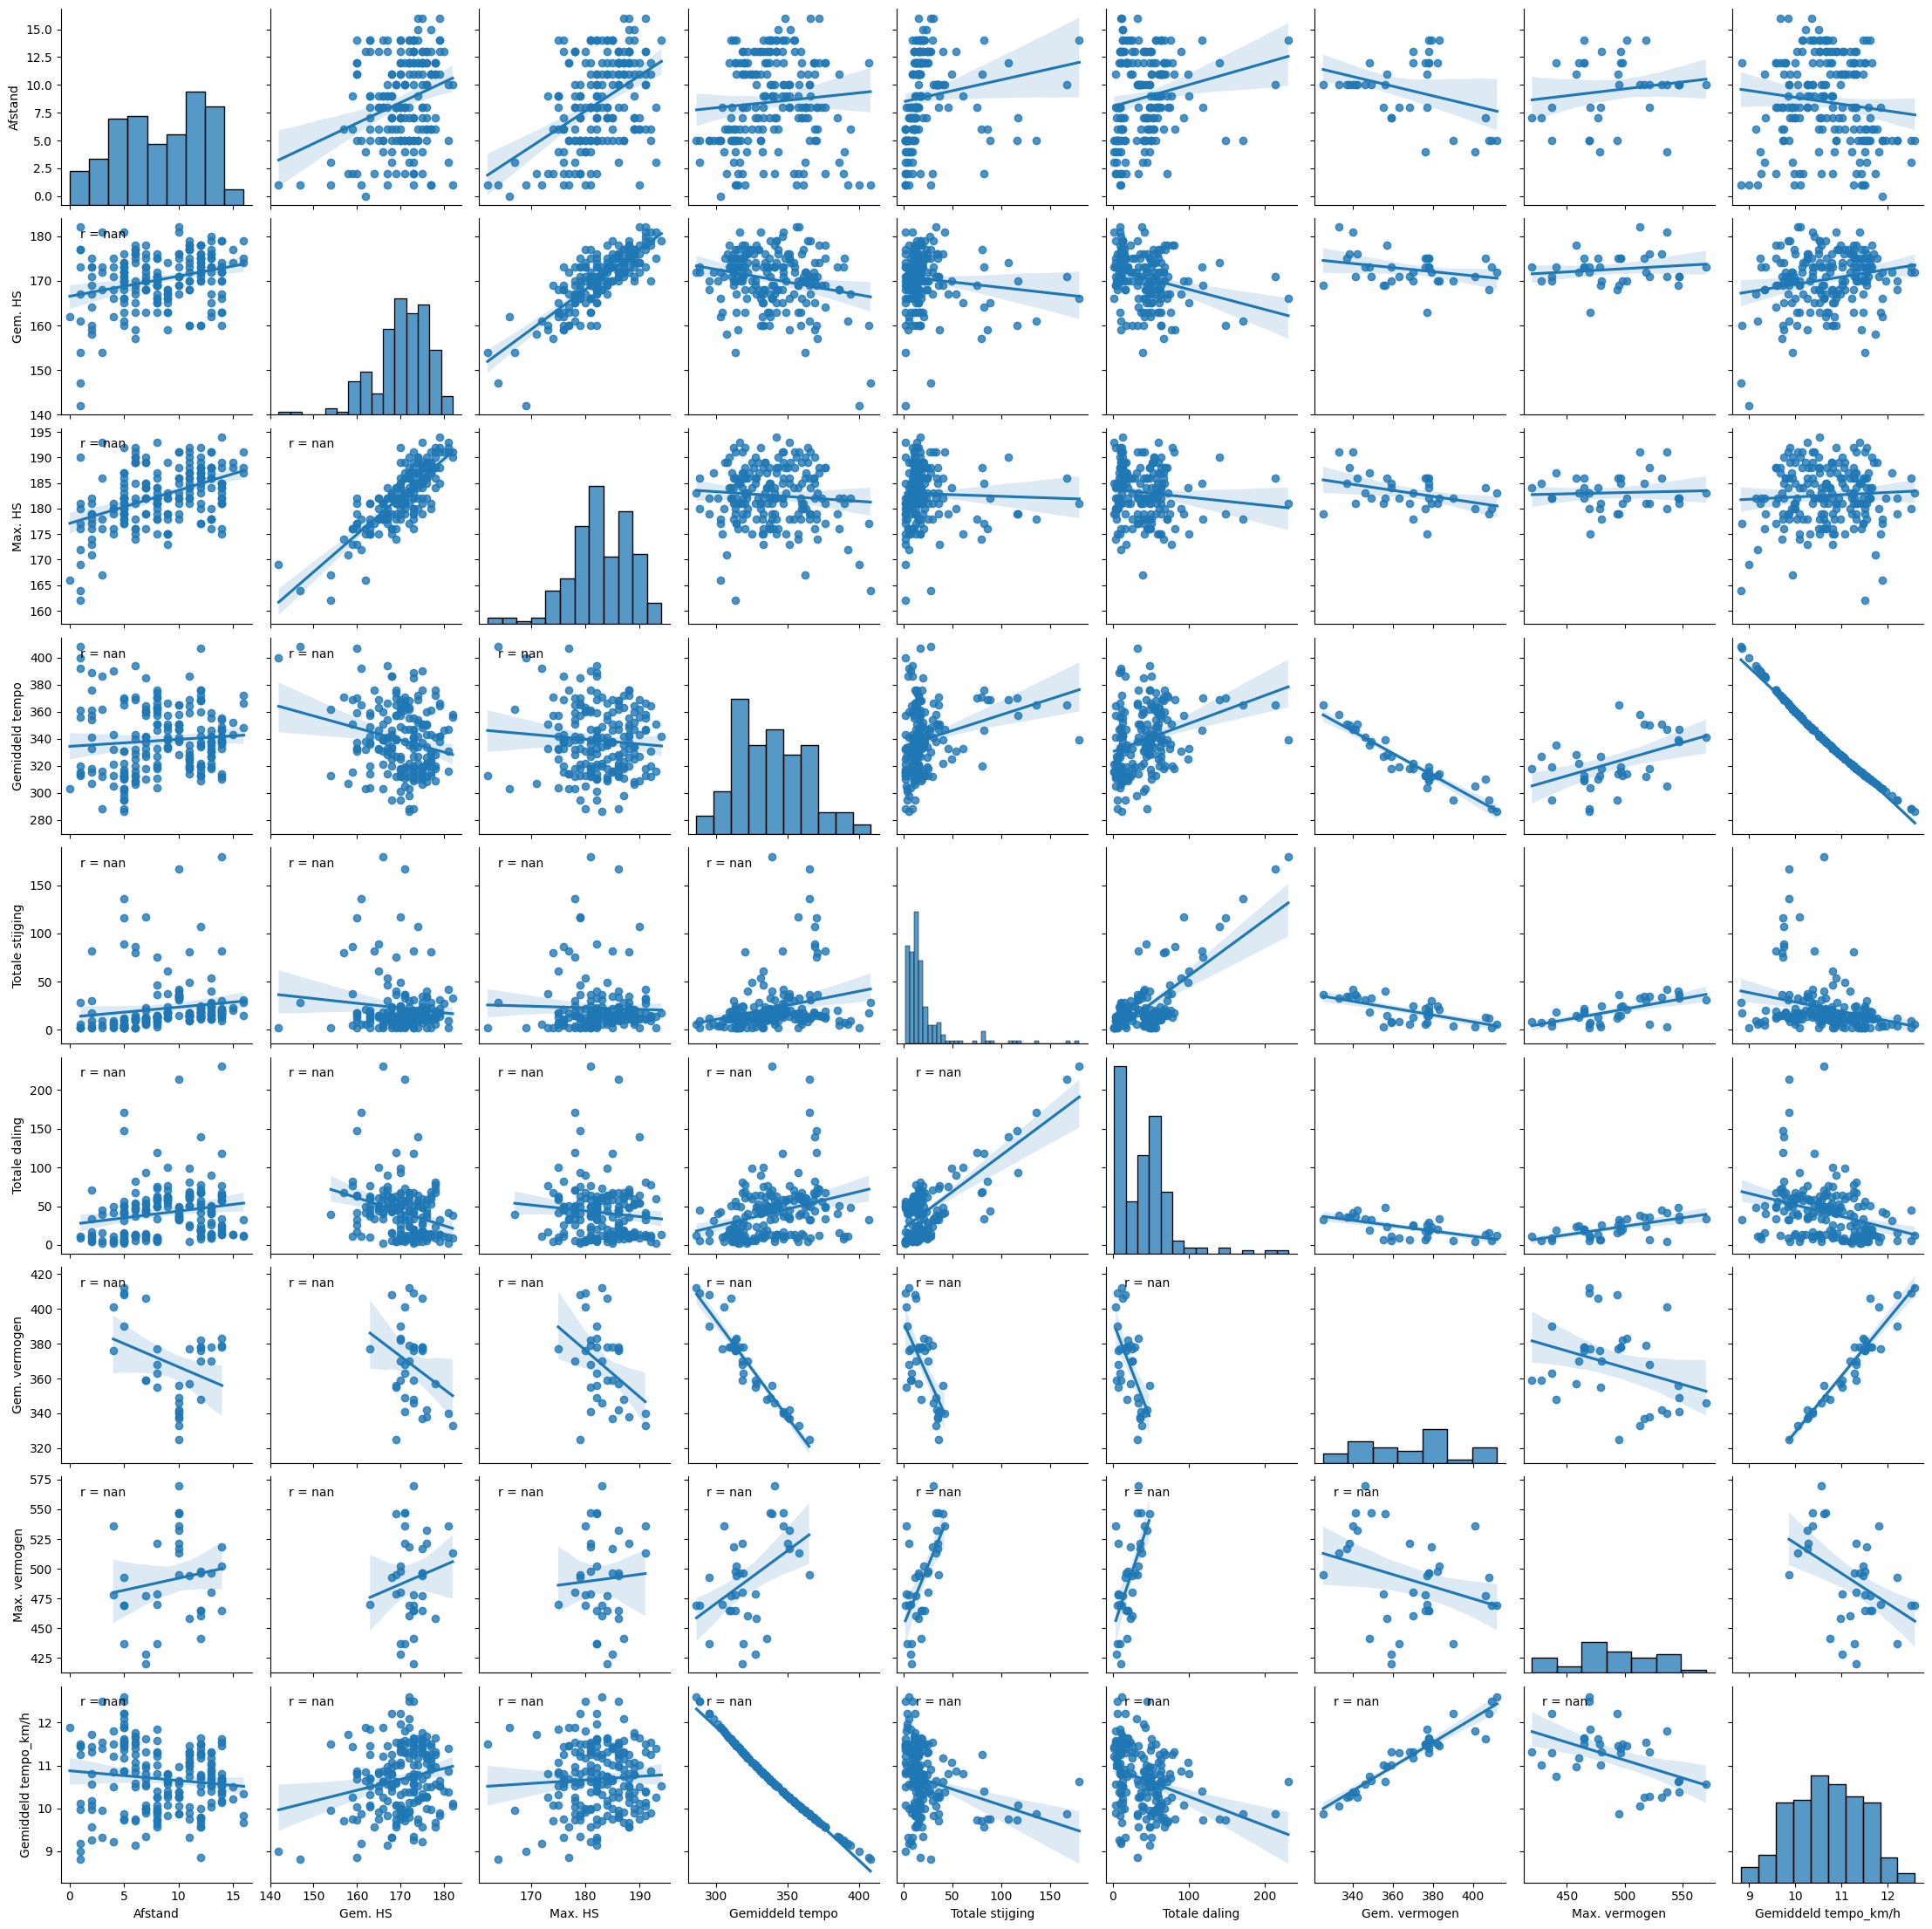

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats  # Import stats from scipy

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

# Select numerical columns for correlation
numerical_cols = ['Afstand', 'Gem. HS', 'Max. HS', 'Gemiddeld tempo', 'Totale stijging',
                  'Totale daling', 'Gem. vermogen', 'Max. vermogen', 'Gemiddeld tempo_km/h']

# Calculate correlation matrix
corr_matrix = garmin_activities_prep[numerical_cols].corr()

# Create the pair plot with correlation coefficients
g = sns.pairplot(garmin_activities_prep[numerical_cols], kind="reg")
g.map_lower(corrfunc)  # Apply corrfunc to the lower triangle
plt.show()

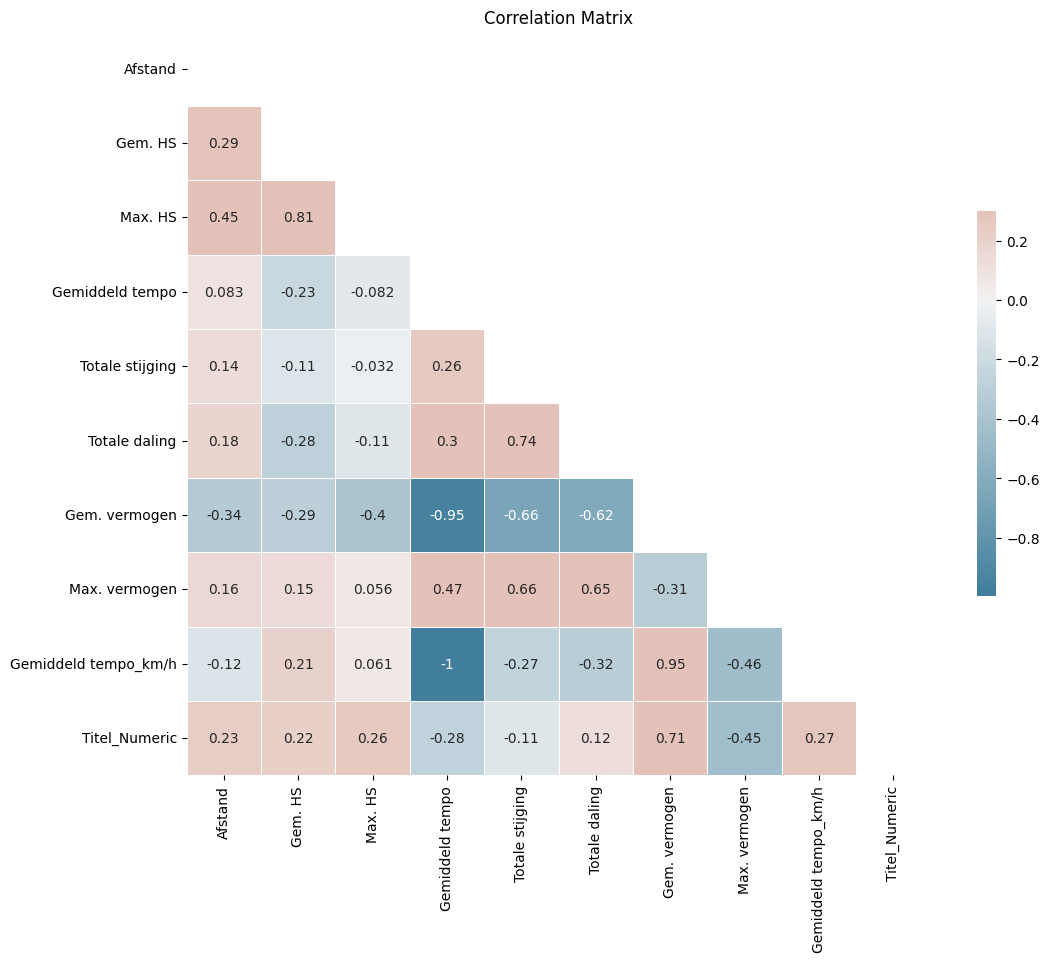

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Convert 'Titel' to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
garmin_activities_prep['Titel_Numeric'] = le.fit_transform(garmin_activities_prep['Titel'])

# Select numerical columns for correlation, including 'Titel_Numeric'
numerical_cols = ['Afstand', 'Gem. HS', 'Max. HS', 'Gemiddeld tempo', 'Totale stijging',
                  'Totale daling', 'Gem. vermogen', 'Max. vermogen', 'Gemiddeld tempo_km/h', 'Titel_Numeric']

# Calculate correlation matrix
corr_matrix = garmin_activities_prep[numerical_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a custom colormap for the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create the heatmap with correlation coefficients
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title("Correlation Matrix")
plt.show()

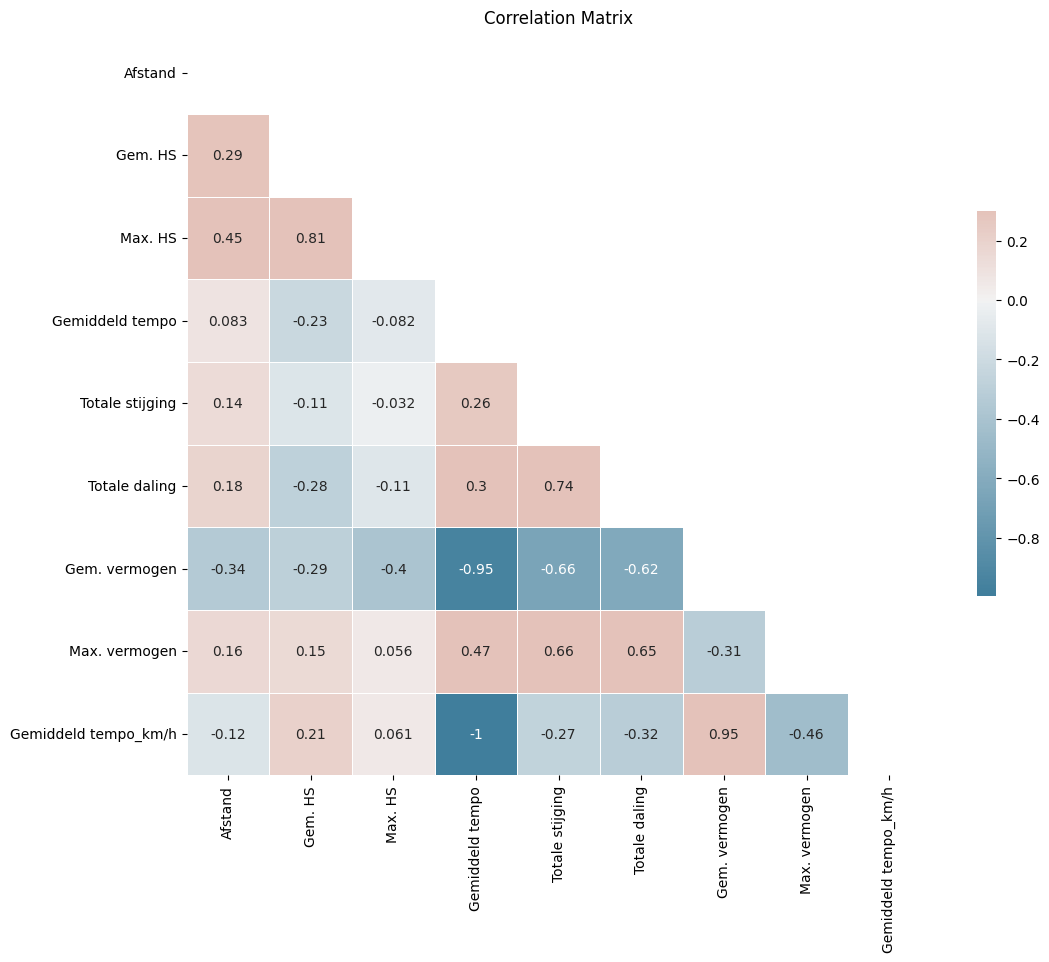

In [ ]:
### afstand en tempo zijn niet echt gecorreleerd. this is de regressie voor alleen afstand

In [220]:
### data splitsen

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preparation
def prepare_data(df):
    # Drop rows with missing values in target variable
    df = df.dropna(subset=['Gemiddeld tempo_km/h'])
    
    # Create distance bins for stratification
    df['distance_bin'] = pd.qcut(df['Afstand'], q=5, labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
    
    return df

# 2. Split Data
def split_data(df):
    # First split: 70% train, 30% remaining
    X = df[['Afstand']]
    y = df['Gemiddeld tempo_km/h']
    strat = df['distance_bin']
    
    X_train, X_temp, y_train, y_temp, strat_train, strat_temp = train_test_split(
        X, y, strat, train_size=0.7, random_state=42, stratify=strat
    )
    
    # Second split: Split remaining 30% into half (15% each for validation and test)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=strat_temp
    )
    
    return X_train, X_val, X_test, y_train, y_val, y_test


In [345]:
### data splitsen

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preparation
def prepare_data(df):
    # Drop rows with missing values in target variable
    df = df.dropna(subset=['gemiddeld_tempo_km/h'])
    
    # Create distance bins for stratification
    df['distance_bin'] = pd.qcut(df['afstand'], q=5, labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
    
    return df

# 2. Split Data
def split_data(df):
    # First split: 70% train, 30% remaining
    X = df[['afstand']]
    y = df['gemiddeld_tempo_km/h']
    strat = df['distance_bin']
    
    X_train, X_temp, y_train, y_temp, strat_train, strat_temp = train_test_split(
        X, y, strat, train_size=0.7, random_state=42, stratify=strat
    )
    
    # Second split: Split remaining 30% into half (15% each for validation and test)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=strat_temp
    )
    
    return X_train, X_val, X_test, y_train, y_val, y_test


# 3. Model Training and Evaluation
def train_and_evaluate_models(X_train, X_val, X_test, y_train, y_val, y_test):
    results = []
    degrees = [1, 2, 3]
    
    for degree in degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)
        X_test_poly = poly.transform(X_test)
        
        # Initialize and train model
        model = LinearRegression()
        
        # Perform 5-fold cross validation on training set
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_train_poly, y_train, cv=kf, scoring='r2')
        
        # Fit model on full training set
        model.fit(X_train_poly, y_train)
        
        # Calculate metrics
        train_r2 = model.score(X_train_poly, y_train)
        val_r2 = model.score(X_val_poly, y_val)
        test_r2 = model.score(X_test_poly, y_test)
        
        results.append({
            'Degree': degree,
            'CV Mean R2': cv_scores.mean(),
            'CV Std R2': cv_scores.std(),
            'Train R2': train_r2,
            'Validation R2': val_r2,
            'Test R2': test_r2
        })
        
    return pd.DataFrame(results)

# 4. Plotting Function
def plot_regression_results(X_train, X_test, y_train, y_test, degrees):
    plt.figure(figsize=(12, 8))
    
    # Plot training data
    plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
    plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Test Data')
    
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train)
        model = LinearRegression()
        model.fit(X_poly, y_train)
        
        # Generate predictions for plotting
        x_range = np.linspace(X_train.min(), X_train.max(), 100)
        X_range_poly = poly.transform(x_range.reshape(-1, 1))
        y_pred = model.predict(X_range_poly)
        
        plt.plot(x_range, y_pred, label=f'Degree {degree}')
    
    plt.xlabel('afstand')
    plt.ylabel('gemiddeld_tempo_km/h')
    plt.title('Polynomial Regression Models with Train/Test Split')
    plt.legend()
    plt.grid(True)
    
    return plt

In [347]:
# Main execution
def analyze_running_performance(df):
    # Prepare data
    df_prepared = prepare_data(df)
    
    # Split data
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(df_prepared)
    
    # Train and evaluate models
    results = train_and_evaluate_models(X_train, X_val, X_test, y_train, y_val, y_test)
    
    # Create plot
    plt = plot_regression_results(X_train, X_test, y_train, y_test, degrees=[1, 2, 3])
    
    return results, plt

# Execute analysis
results, plt = analyze_running_performance(garmin_activities_prep)
print("\nModel Performance Results:")
print(results.to_string(index=False))
plt.show()

KeyError: ['gemiddeld_tempo_km/h']

In [252]:
# Remove 'hardlopen' (case insensitive) from Titel column
garmin_activities_prep['Titel'] = garmin_activities_prep['Titel'].str.replace('hardlopen', '', case=False).str.strip()

# Remove any potential double spaces that might have been created
garmin_activities_prep['Titel'] = garmin_activities_prep['Titel'].str.replace('  ', ' ')

import string

# Remove punctuation and convert to lowercase
garmin_activities_prep.columns = (
    garmin_activities_prep.columns
    .str.lower()  # Convert to lowercase
    .str.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    .str.replace(' ', '_')  # Replace spaces with underscores
)

garmin_activities_prep.head()


datum         titel  afstand  gem_hs  max_hs gemiddeld_tempo  \
0  20-12-2024 15:38        Waalre     12.0   172.0   183.0           05:22   
1  12-12-2024 13:54        Waalre     11.0   178.0   186.0           05:28   
2   3-12-2024 15:56  Loon op Zand     10.0   173.0   183.0           05:41   
3  26-11-2024 15:56  Loon op Zand     10.0   176.0   188.0           05:50   
4  19-11-2024 16:06  Loon op Zand     10.0   182.0   191.0           05:58   

   totale_stijging  totale_daling  gem_vermogen  max_vermogen tijd_bewogen  \
0             13.0           25.0         370.0         460.0     01:01:59   
1             15.0           23.0         357.0         458.0     01:02:40   
2             31.0           34.0         346.0         570.0     00:57:12   
3             35.0           36.0         338.0         521.0     01:00:02   
4             33.0           38.0         333.0         513.0     00:58:51   

  tracklengths  
0           20  
1           12  
2           12  
3           12  
4           12

In [226]:
### add features
garmin_activities_addfeatures.head()

datum         plaats  afstand  addfeat_asphalt  addfeat_forest  \
0  20-12-2024 15:38        Waalre     11.54             1.00            0.00   
1  12-12-2024 13:54        Waalre     11.46             1.00            0.00   
2   3-12-2024 15:56  Loon op Zand     10.08             0.64            0.12   
3  26-11-2024 15:56  Loon op Zand     10.31             0.64            0.12   
4  19-11-2024 16:06  Loon op Zand      9.88             0.64            0.12   

   addfeat_dunes  addfeat_temp addfeat_sky  addfeat_windsp addfeat_winddir  \
0           0.00           6.1     bewolkt              20             zzw   
1           0.00           2.8        mist               2             nnw   
2           0.24           6.7     bewolkt              11              nw   
3           0.24           9.4     bewolkt              11             zzw   
4           0.24           3.9     bewolkt              11             nnw   

   addfeat_humid  
0           0.87  
1           1.00  
2           0.74  
3           0.84  
4           0.92

In [253]:
# First ensure both datetime columns are in the same format
garmin_activities_prep['datum'] = pd.to_datetime(garmin_activities_prep['datum'])
garmin_activities_addfeatures['datum'] = pd.to_datetime(garmin_activities_addfeatures['datum'])

# Perform left join
garmin_activities_merged = pd.merge(
    garmin_activities_prep,
    garmin_activities_addfeatures,
    on=['datum'],  # Replace 'second_column' with your actual second column
    how='left'
)

garmin_activities_merged

datum                   titel  afstand_x  gem_hs  max_hs  \
0   2024-12-20 15:38:00                  Waalre       12.0   172.0   183.0   
1   2024-12-12 13:54:00                  Waalre       11.0   178.0   186.0   
2   2024-12-03 15:56:00            Loon op Zand       10.0   173.0   183.0   
3   2024-11-26 15:56:00            Loon op Zand       10.0   176.0   188.0   
4   2024-11-19 16:06:00            Loon op Zand       10.0   182.0   191.0   
..                  ...                     ...        ...     ...     ...   
195 2020-09-10 12:35:00                  Waalre       13.0   180.0   191.0   
196 2020-08-27 16:47:00            Heeze-Leende       11.0   179.0   192.0   
197 2020-08-07 17:15:00  Bad Lauterberg im Harz        5.0   165.0   182.0   
198 2020-08-05 17:19:00  Bad Lauterberg im Harz        6.0   157.0   174.0   
199 2020-08-04 17:04:00  Bad Lauterberg im Harz        6.0   159.0   176.0   

    gemiddeld_tempo  totale_stijging  totale_daling  gem_vermogen  \
0             05:22             13.0           25.0         370.0   
1             05:28             15.0           23.0         357.0   
2             05:41             31.0           34.0         346.0   
3             05:50             35.0           36.0         338.0   
4             05:58             33.0           38.0         333.0   
..              ...              ...            ...           ...   
195           05:46             27.0           11.0           NaN   
196           06:04             14.0            4.0           NaN   
197           06:09             89.0           44.0           NaN   
198           06:11             80.0           67.0           NaN   
199           06:09             86.0           82.0           NaN   

     max_vermogen  ...                   plaats afstand_y addfeat_asphalt  \
0           460.0  ...                  Waalre      11.54            1.00   
1           458.0  ...                  Waalre      11.46            1.00   
2           570.0  ...            Loon op Zand      10.08            0.64   
3           521.0  ...            Loon op Zand      10.31            0.64   
4           513.0  ...            Loon op Zand       9.88            0.64   
..            ...  ...                      ...       ...             ...   
195           NaN  ...                  Waalre      12.53            0.62   
196           NaN  ...            Heeze-Leende      11.26            0.64   
197           NaN  ...  Bad Lauterberg im Harz       5.05            0.90   
198           NaN  ...  Bad Lauterberg im Harz       5.53            0.90   
199           NaN  ...  Bad Lauterberg im Harz       5.66            0.90   

     addfeat_forest  addfeat_dunes  addfeat_temp  addfeat_sky  addfeat_windsp  \
0              0.00           0.00           6.1      bewolkt            20.0   
1              0.00           0.00           2.8         mist             2.0   
2              0.12           0.24           6.7      bewolkt            11.0   
3              0.12           0.24           9.4      bewolkt            11.0   
4              0.12           0.24           3.9      bewolkt            11.0   
..              ...            ...           ...          ...             ...   
195            0.38           0.00          18.9      bewolkt            11.0   
196            0.36           0.00          21.1      bewolkt            15.0   
197            0.10           0.00          31.1          zon            11.0   
198            0.10           0.00          27.8          zon             9.0   
199            0.10           0.00          22.2          zon            15.0   

    addfeat_winddir  addfeat_humid  
0               zzw           0.87  
1               nnw           1.00  
2                nw           0.74  
3               zzw           0.84  
4               nnw           0.92  
..              ...            ...  
195             nno           0.46  
196             zzo           0.53  
197               o  

In [254]:
garmin_activities_merged = garmin_activities_merged[garmin_activities_merged['titel'].notna() & (garmin_activities_merged['titel'] != '')]
garmin_activities_merged

datum                   titel  afstand_x  gem_hs  max_hs  \
0   2024-12-20 15:38:00                  Waalre       12.0   172.0   183.0   
1   2024-12-12 13:54:00                  Waalre       11.0   178.0   186.0   
2   2024-12-03 15:56:00            Loon op Zand       10.0   173.0   183.0   
3   2024-11-26 15:56:00            Loon op Zand       10.0   176.0   188.0   
4   2024-11-19 16:06:00            Loon op Zand       10.0   182.0   191.0   
..                  ...                     ...        ...     ...     ...   
195 2020-09-10 12:35:00                  Waalre       13.0   180.0   191.0   
196 2020-08-27 16:47:00            Heeze-Leende       11.0   179.0   192.0   
197 2020-08-07 17:15:00  Bad Lauterberg im Harz        5.0   165.0   182.0   
198 2020-08-05 17:19:00  Bad Lauterberg im Harz        6.0   157.0   174.0   
199 2020-08-04 17:04:00  Bad Lauterberg im Harz        6.0   159.0   176.0   

    gemiddeld_tempo  totale_stijging  totale_daling  gem_vermogen  \
0             05:22             13.0           25.0         370.0   
1             05:28             15.0           23.0         357.0   
2             05:41             31.0           34.0         346.0   
3             05:50             35.0           36.0         338.0   
4             05:58             33.0           38.0         333.0   
..              ...              ...            ...           ...   
195           05:46             27.0           11.0           NaN   
196           06:04             14.0            4.0           NaN   
197           06:09             89.0           44.0           NaN   
198           06:11             80.0           67.0           NaN   
199           06:09             86.0           82.0           NaN   

     max_vermogen  ...                   plaats afstand_y addfeat_asphalt  \
0           460.0  ...                  Waalre      11.54            1.00   
1           458.0  ...                  Waalre      11.46            1.00   
2           570.0  ...            Loon op Zand      10.08            0.64   
3           521.0  ...            Loon op Zand      10.31            0.64   
4           513.0  ...            Loon op Zand       9.88            0.64   
..            ...  ...                      ...       ...             ...   
195           NaN  ...                  Waalre      12.53            0.62   
196           NaN  ...            Heeze-Leende      11.26            0.64   
197           NaN  ...  Bad Lauterberg im Harz       5.05            0.90   
198           NaN  ...  Bad Lauterberg im Harz       5.53            0.90   
199           NaN  ...  Bad Lauterberg im Harz       5.66            0.90   

     addfeat_forest  addfeat_dunes  addfeat_temp  addfeat_sky  addfeat_windsp  \
0              0.00           0.00           6.1      bewolkt            20.0   
1              0.00           0.00           2.8         mist             2.0   
2              0.12           0.24           6.7      bewolkt            11.0   
3              0.12           0.24           9.4      bewolkt            11.0   
4              0.12           0.24           3.9      bewolkt            11.0   
..              ...            ...           ...          ...             ...   
195            0.38           0.00          18.9      bewolkt            11.0   
196            0.36           0.00          21.1      bewolkt            15.0   
197            0.10           0.00          31.1          zon            11.0   
198            0.10           0.00          27.8          zon             9.0   
199            0.10           0.00          22.2          zon            15.0   

    addfeat_winddir  addfeat_humid  
0               zzw           0.87  
1               nnw           1.00  
2                nw           0.74  
3               zzw           0.84  
4               nnw           0.92  
..              ...            ...  
195             nno           0.46  
196             zzo           0.53  
197               o  

In [255]:
### remove vermogen -> ander horloge 
drop_cols_merged = ['titel', 'plaats','afstand_x','gem_vermogen', 'max_vermogen']

garmin_activities_merged.drop(drop_cols_merged, axis=1, inplace=True)
garmin_activities_merged

datum  gem_hs  max_hs gemiddeld_tempo  totale_stijging  \
0   2024-12-20 15:38:00   172.0   183.0           05:22             13.0   
1   2024-12-12 13:54:00   178.0   186.0           05:28             15.0   
2   2024-12-03 15:56:00   173.0   183.0           05:41             31.0   
3   2024-11-26 15:56:00   176.0   188.0           05:50             35.0   
4   2024-11-19 16:06:00   182.0   191.0           05:58             33.0   
..                  ...     ...     ...             ...              ...   
195 2020-09-10 12:35:00   180.0   191.0           05:46             27.0   
196 2020-08-27 16:47:00   179.0   192.0           06:04             14.0   
197 2020-08-07 17:15:00   165.0   182.0           06:09             89.0   
198 2020-08-05 17:19:00   157.0   174.0           06:11             80.0   
199 2020-08-04 17:04:00   159.0   176.0           06:09             86.0   

     totale_daling tijd_bewogen tracklengths  afstand_y  addfeat_asphalt  \
0             25.0     01:01:59           20      11.54             1.00   
1             23.0     01:02:40           12      11.46             1.00   
2             34.0     00:57:12           12      10.08             0.64   
3             36.0     01:00:02           12      10.31             0.64   
4             38.0     00:58:51           12       9.88             0.64   
..             ...          ...          ...        ...              ...   
195           11.0     01:12:09           20      12.53             0.62   
196            4.0     01:08:19           12      11.26             0.64   
197           44.0     00:31:05            8       5.05             0.90   
198           67.0     00:34:12            8       5.53             0.90   
199           82.0     00:34:45            8       5.66             0.90   

     addfeat_forest  addfeat_dunes  addfeat_temp addfeat_sky  addfeat_windsp  \
0              0.00           0.00           6.1     bewolkt            20.0   
1              0.00           0.00           2.8        mist             2.0   
2              0.12           0.24           6.7     bewolkt            11.0   
3              0.12           0.24           9.4     bewolkt            11.0   
4              0.12           0.24           3.9     bewolkt            11.0   
..              ...            ...           ...         ...             ...   
195            0.38           0.00          18.9     bewolkt            11.0   
196            0.36           0.00          21.1     bewolkt            15.0   
197            0.10           0.00          31.1         zon            11.0   
198            0.10           0.00          27.8         zon             9.0   
199            0.10           0.00          22.2         zon            15.0   

    addfeat_winddir  addfeat_humid  
0               zzw           0.87  
1               nnw           1.00  
2                nw           0.74  
3               zzw           0.84  
4               nnw           0.92  
..              ...            ...  
195             nno           0.46  
196             zzo           0.53  
197               o           0.38  
198              zw           0.28  
199               w           0.38  

[197 rows x 17 columns]

In [267]:
# Convert 'tijd_bewogen' to total seconds
garmin_activities_merged['tijd_bewogen'] = pd.to_timedelta(garmin_activities_merged['tijd_bewogen']).dt.total_seconds()


In [272]:
garmin_activities_merged.drop('time_diff', axis=1)
garmin_activities_merged.dtypes

datum                    datetime64[ns]
gem_hs                          float64
max_hs                          float64
gemiddeld_tempo                 float64
totale_stijging                 float64
totale_daling                   float64
tijd_bewogen                    float64
tracklengths                     object
afstand_y                       float64
addfeat_asphalt                 float64
addfeat_forest                  float64
addfeat_dunes                   float64
addfeat_temp                    float64
addfeat_sky                      object
addfeat_windsp                  float64
addfeat_winddir                  object
addfeat_humid                   float64
gemiddeld_tempo_km/h            float64
time_diff               timedelta64[ns]
dtype: object

In [273]:
# First convert Datum to datetime if it's not already
garmin_activities_merged['datum'] = pd.to_datetime(garmin_activities_merged['datum'])

# Sort by date to ensure correct comparison
garmin_activities_merged = garmin_activities_merged.sort_values('datum')

garmin_activities_merged['gemiddeld_tempo'] = pd.to_timedelta('00:' + garmin_activities_merged['gemiddeld_tempo'])

    # Extract total seconds from timedelta objects
garmin_activities_merged['gemiddeld_tempo'] = garmin_activities_merged['gemiddeld_tempo'].dt.total_seconds()

garmin_activities_merged['gemiddeld_tempo_km/h'] = 3600 / garmin_activities_merged['gemiddeld_tempo']
garmin_activities_merged

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U3'), dtype('float64')) -> None

In [266]:
garmin_activities_merged_2 = garmin_activities_merged
garmin_activities_merged_2['time_diff'] = garmin_activities_merged['datum'].diff()
garmin_activities_merged_2

In [274]:
import pandas as pd

# Step 1: Sort by 'datum'
garmin_activities_merged = garmin_activities_merged.sort_values(by='datum').reset_index(drop=True)

# Step 2: Calculate time difference with the previous row
time_diff = garmin_activities_merged['datum'].diff()

# Step 3: Define columns for aggregation
sum_columns = ['afstand_y', 'totale_stijging', 'totale_daling', 'tijd_bewogen']
avg_columns = ['gem_hs', 'gemiddeld_tempo', 'addfeat_asphalt', 'addfeat_forest',
               'addfeat_dunes', 'addfeat_temp', 'addfeat_windsp', 'addfeat_humid']
max_columns = ['max_hs']
keep_first_row_entry_columns = ['datum', 'addfeat_winddir', 'tracklengths']

# Function to merge consecutive rows where time difference < 1 hour
def merge_rows(df):
    merged_rows = []
    temp_group = df.iloc[0].copy()  # Start with the first row
    
    for i in range(1, len(df)):
        current_row = df.iloc[i]
        
        # Check if time difference is less than 1 hour
        if (current_row['datum'] - temp_group['datum']) < pd.Timedelta(hours=1):
            # Merge values
            for col in sum_columns:
                temp_group[col] += current_row[col]
            
            for col in avg_columns:
                temp_group[col] = (temp_group[col] + current_row[col]) / 2  # Update average
            
            for col in max_columns:
                temp_group[col] = max(temp_group[col], current_row[col])
            
            # Keep the first row's entry for specific columns (no change needed)
        
        else:
            # Store merged result and start a new group
            merged_rows.append(temp_group)
            temp_group = current_row.copy()
    
    # Append the last processed row
    merged_rows.append(temp_group)
    
    return pd.DataFrame(merged_rows)

# Step 4: Keep repeating until all necessary rows are merged
previous_length = len(garmin_activities_merged) + 1  # Set a different initial length
while previous_length > len(garmin_activities_merged):  # Run until no more merging occurs
    previous_length = len(garmin_activities_merged)
    garmin_activities_merged = merge_rows(garmin_activities_merged)

# Final cleaned DataFrame
garmin_activities_cleaned = garmin_activities_merged.reset_index(drop=True)
garmin_activities_cleaned


datum  gem_hs  max_hs  gemiddeld_tempo  totale_stijging  \
0   2020-08-04 17:04:00   159.0   176.0            369.0             86.0   
1   2020-08-05 17:19:00   157.0   174.0            371.0             80.0   
2   2020-08-07 17:15:00   165.0   182.0            369.0             89.0   
3   2020-08-27 16:47:00   179.0   192.0            364.0             14.0   
4   2020-09-10 12:35:00   180.0   191.0            346.0             27.0   
..                  ...     ...     ...              ...              ...   
176 2024-11-19 16:06:00   182.0   191.0            358.0             33.0   
177 2024-11-26 15:56:00   176.0   188.0            350.0             35.0   
178 2024-12-03 15:56:00   173.0   183.0            341.0             31.0   
179 2024-12-12 13:54:00   178.0   186.0            328.0             15.0   
180 2024-12-20 15:38:00   172.0   183.0            322.0             13.0   

     totale_daling  tijd_bewogen tracklengths  afstand_y  addfeat_asphalt  \
0             82.0        2085.0            8       5.66             0.90   
1             67.0        2052.0            8       5.53             0.90   
2             44.0        1865.0            8       5.05             0.90   
3              4.0        4099.0           12      11.26             0.64   
4             11.0        4329.0           20      12.53             0.62   
..             ...           ...          ...        ...              ...   
176           38.0        3531.0           12       9.88             0.64   
177           36.0        3602.0           12      10.31             0.64   
178           34.0        3432.0           12      10.08             0.64   
179           23.0        3760.0           12      11.46             1.00   
180           25.0        3719.0           20      11.54             1.00   

     addfeat_forest  addfeat_dunes  addfeat_temp addfeat_sky  addfeat_windsp  \
0              0.10           0.00          22.2         zon            15.0   
1              0.10           0.00          27.8         zon             9.0   
2              0.10           0.00          31.1         zon            11.0   
3              0.36           0.00          21.1     bewolkt            15.0   
4              0.38           0.00          18.9     bewolkt            11.0   
..              ...            ...           ...         ...             ...   
176            0.12           0.24           3.9     bewolkt            11.0   
177            0.12           0.24           9.4     bewolkt            11.0   
178            0.12           0.24           6.7     bewolkt            11.0   
179            0.00           0.00           2.8        mist             2.0   
180            0.00           0.00           6.1     bewolkt            20.0   

    addfeat_winddir  addfeat_humid  gemiddeld_tempo_km/h        time_diff  
0                 w           0.38              9.756098              NaT  
1                zw           0.28              9.703504  1 days 00:15:00  
2                 o           0.38              9.756098  1 days 23:56:00  
3               zzo           0.53              9.890110 19 days 23:32:00  
4               nno           0.46             10.404624 13 days 19:48:00  
..              ...            ...                   ...              ...  
176             nnw           0.92             10.055866 13 days 23:59:00  
177             zzw           0.84             10.285714  6 days 23:50:00  
178              nw           0.74             10.557185  7 days 00:00:00  
179             nnw           1.00             10.975610  8 days 21:58:00  
180             zzw           0.87             11.180124  8 days 01:44:00  

[181 rows x 19 columns]

In [278]:
cols = ['addfeat_sky', 'addfeat_winddir', 'datum', 'time_diff']

garmin_activities_cleaned.drop(cols, axis=1,inplace=True)
garmin_activities_cleaned

gem_hs  max_hs  gemiddeld_tempo  totale_stijging  totale_daling  \
0     159.0   176.0            369.0             86.0           82.0   
1     157.0   174.0            371.0             80.0           67.0   
2     165.0   182.0            369.0             89.0           44.0   
3     179.0   192.0            364.0             14.0            4.0   
4     180.0   191.0            346.0             27.0           11.0   
..      ...     ...              ...              ...            ...   
176   182.0   191.0            358.0             33.0           38.0   
177   176.0   188.0            350.0             35.0           36.0   
178   173.0   183.0            341.0             31.0           34.0   
179   178.0   186.0            328.0             15.0           23.0   
180   172.0   183.0            322.0             13.0           25.0   

     tijd_bewogen tracklengths  afstand_y  addfeat_asphalt  addfeat_forest  \
0          2085.0            8       5.66             0.90            0.10   
1          2052.0            8       5.53             0.90            0.10   
2          1865.0            8       5.05             0.90            0.10   
3          4099.0           12      11.26             0.64            0.36   
4          4329.0           20      12.53             0.62            0.38   
..            ...          ...        ...              ...             ...   
176        3531.0           12       9.88             0.64            0.12   
177        3602.0           12      10.31             0.64            0.12   
178        3432.0           12      10.08             0.64            0.12   
179        3760.0           12      11.46             1.00            0.00   
180        3719.0           20      11.54             1.00            0.00   

     addfeat_dunes  addfeat_temp  addfeat_windsp  addfeat_humid  \
0             0.00          22.2            15.0           0.38   
1             0.00          27.8             9.0           0.28   
2             0.00          31.1            11.0           0.38   
3             0.00          21.1            15.0           0.53   
4             0.00          18.9            11.0           0.46   
..             ...           ...             ...            ...   
176           0.24           3.9            11.0           0.92   
177           0.24           9.4            11.0           0.84   
178           0.24           6.7            11.0           0.74   
179           0.00           2.8             2.0           1.00   
180           0.00           6.1            20.0           0.87   

     gemiddeld_tempo_km/h  
0                9.756098  
1                9.703504  
2                9.756098  
3                9.890110  
4               10.404624  
..                    ...  
176             10.055866  
177             10.285714  
178             10.557185  
179             10.975610  
180             11.180124  

[181 rows x 15 columns]

In [279]:
garmin_activities_cleaned.dtypes

gem_hs                  float64
max_hs                  float64
gemiddeld_tempo         float64
totale_stijging         float64
totale_daling           float64
tijd_bewogen            float64
tracklengths             object
afstand_y               float64
addfeat_asphalt         float64
addfeat_forest          float64
addfeat_dunes           float64
addfeat_temp            float64
addfeat_windsp          float64
addfeat_humid           float64
gemiddeld_tempo_km/h    float64
dtype: object

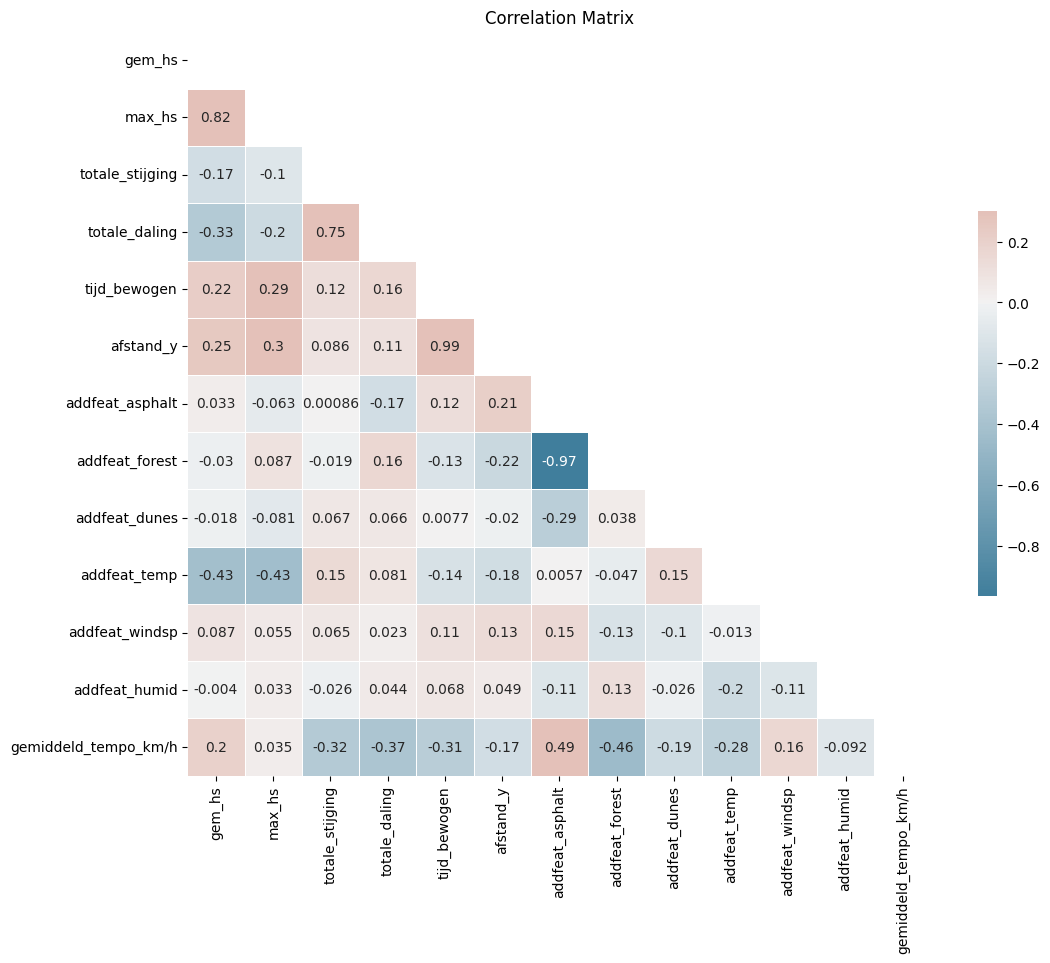

In [283]:

# Select numerical columns for correlation, including 'Titel_Numeric'
drop_cols = ['tracklengths', 'gemiddeld_tempo']

# Calculate correlation matrix
corr_matrix = garmin_activities_cleaned.drop(drop_cols, axis =1).corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a custom colormap for the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create the heatmap with correlation coefficients
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [307]:
# Select numerical columns for correlation, including 'Titel_Numeric'
drop_cols = ['tracklengths', 'gemiddeld_tempo', 'gem_hs', 'max_hs']

corr_df = garmin_activities_cleaned.drop(drop_cols, axis=1).corr()

# Get correlation values for a specific column (e.g., 'Afstand')
#afstand_corr = corr_df['afstand_y']

# Print the correlation values for 'Afstand'
#print(afstand_corr)

print(corr_df['gemiddeld_tempo_km/h'])
#type(corr_df['gemiddeld_tempo_km/h'])
# To get correlation values for all columns, you can iterate:
#for column in corr_df.columns:
    #print(f"Correlation values for {column}:")
    #print(corr_df[column])
    #print("-" * 20)  # Separator

totale_stijging        -0.323658
totale_daling          -0.373277
tijd_bewogen           -0.306734
afstand_y              -0.168419
addfeat_asphalt         0.486342
addfeat_forest         -0.457435
addfeat_dunes          -0.189760
addfeat_temp           -0.276915
addfeat_windsp          0.158032
addfeat_humid          -0.092308
gemiddeld_tempo_km/h    1.000000
Name: gemiddeld_tempo_km/h, dtype: float64


In [319]:
# Assuming you have the correlation DataFrame 'corr_df' and a threshold value
threshold = 0.16  # Set your desired threshold

# Filter correlation values for 'gemiddeld_tempo_km/h'
filtered_corr_series = corr_df['gemiddeld_tempo_km/h'][corr_df['gemiddeld_tempo_km/h'].abs() > threshold]

# Print the filtered correlation Series
print(filtered_corr_series)

totale_stijging        -0.323658
totale_daling          -0.373277
tijd_bewogen           -0.306734
afstand_y              -0.168419
addfeat_asphalt         0.486342
addfeat_forest         -0.457435
addfeat_dunes          -0.189760
addfeat_temp           -0.276915
gemiddeld_tempo_km/h    1.000000
Name: gemiddeld_tempo_km/h, dtype: float64


In [320]:
# Select numerical columns for correlation, including 'Titel_Numeric'
drop_cols = ['tracklengths', 'gemiddeld_tempo', 'gem_hs', 'max_hs']

garmin_activities_filtered = garmin_activities_cleaned.drop(drop_cols, axis=1)

# Filter corr_df based on filtered_corr_series
garmin_activities_filtered = garmin_activities_filtered[filtered_corr_series.index]
garmin_activities_filtered

totale_stijging  totale_daling  tijd_bewogen  afstand_y  addfeat_asphalt  \
0               86.0           82.0        2085.0       5.66             0.90   
1               80.0           67.0        2052.0       5.53             0.90   
2               89.0           44.0        1865.0       5.05             0.90   
3               14.0            4.0        4099.0      11.26             0.64   
4               27.0           11.0        4329.0      12.53             0.62   
..               ...            ...           ...        ...              ...   
176             33.0           38.0        3531.0       9.88             0.64   
177             35.0           36.0        3602.0      10.31             0.64   
178             31.0           34.0        3432.0      10.08             0.64   
179             15.0           23.0        3760.0      11.46             1.00   
180             13.0           25.0        3719.0      11.54             1.00   

     addfeat_forest  addfeat_dunes  addfeat_temp  gemiddeld_tempo_km/h  
0              0.10           0.00          22.2              9.756098  
1              0.10           0.00          27.8              9.703504  
2              0.10           0.00          31.1              9.756098  
3              0.36           0.00          21.1              9.890110  
4              0.38           0.00          18.9             10.404624  
..              ...            ...           ...                   ...  
176            0.12           0.24           3.9             10.055866  
177            0.12           0.24           9.4             10.285714  
178            0.12           0.24           6.7             10.557185  
179            0.00           0.00           2.8             10.975610  
180            0.00           0.00           6.1             11.180124  

[181 rows x 9 columns]

In [311]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ----------- ---------------------------- 2.9/9.8 MB 18.6 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 20.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\michel.marien_icarew\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [314]:
import statsmodels


ModuleNotFoundError: No module named 'statsmodels'

In [313]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have your feature matrix in a DataFrame called 'X'
# and your target variable in a Series called 'y'

# Select numerical columns for correlation, including 'Titel_Numeric'
drop_cols = ['tracklengths', 'gemiddeld_tempo', 'gem_hs', 'max_hs']

garmin_activities_cleaned.vif = garmin_activities_cleaned.drop(drop_cols, axis=1)

# Add a constant column to the feature matrix (required for VIF calculation)
garmin_activities_cleaned.vif['intercept'] = 1

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = garmin_activities_cleaned.vif.columns
vif["VIF"] = [variance_inflation_factor(garmin_activities_cleaned.vif.values, i) for i in range(garmin_activities_cleaned.vif.shape[1])]

# Display the VIF values
print(vif)

ModuleNotFoundError: No module named 'statsmodels'

In [315]:
### data splitsen

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preparation
def prepare_data(df):
    # Drop rows with missing values in target variable
    df = df.dropna(subset=['gemiddeld_tempo_km/h'])
    
    # Create distance bins for stratification
    df['distance_bin'] = pd.qcut(df['afstand_y'], q=5, labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
    
    return df

def split_data(df):
   # Drop target variable and non-numeric columns
   target_col = 'gemiddeld_tempo_km/h'
   X = df.select_dtypes(include=['float64', 'int64']).drop([target_col, 'distance_bin'], axis=1)
   y = df[target_col]
   strat = df['distance_bin']
   
   # First split: 70% train, 30% remaining
   X_train, X_temp, y_train, y_temp, strat_train, strat_temp = train_test_split(
       X, y, strat, train_size=0.7, random_state=42, stratify=strat
   )
   
   # Second split: Split remaining 30% into half (15% each for validation and test)
   X_val, X_test, y_val, y_test = train_test_split(
       X_temp, y_temp, test_size=0.5, random_state=42, stratify=strat_temp
   )
   
   return X_train, X_val, X_test, y_train, y_val, y_test


# 3. Model Training and Evaluation
def train_and_evaluate_models(X_train, X_val, X_test, y_train, y_val, y_test):
    results = []
    degrees = [1, 2, 3]
    
    for degree in degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)
        X_test_poly = poly.transform(X_test)
        
        # Initialize and train model
        model = LinearRegression()
        
        # Perform 5-fold cross validation on training set
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_train_poly, y_train, cv=kf, scoring='r2')
        
        # Fit model on full training set
        model.fit(X_train_poly, y_train)
        
        # Calculate metrics
        train_r2 = model.score(X_train_poly, y_train)
        val_r2 = model.score(X_val_poly, y_val)
        test_r2 = model.score(X_test_poly, y_test)
        
        results.append({
            'Degree': degree,
            'CV Mean R2': cv_scores.mean(),
            'CV Std R2': cv_scores.std(),
            'Train R2': train_r2,
            'Validation R2': val_r2,
            'Test R2': test_r2
        })
        
    return pd.DataFrame(results)

# 4. Plotting Function
def plot_regression_results(X_train, X_test, y_train, y_test, degrees):
    plt.figure(figsize=(12, 8))
    
    # Plot training data
    plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
    plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Test Data')
    
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train)
        model = LinearRegression()
        model.fit(X_poly, y_train)
        
        # Generate predictions for plotting
        x_range = np.linspace(X_train.min(), X_train.max(), 100)
        X_range_poly = poly.transform(x_range.reshape(-1, 1))
        y_pred = model.predict(X_range_poly)
        
        plt.plot(x_range, y_pred, label=f'Degree {degree}')
    
    plt.xlabel('afstand_y')
    plt.ylabel('gemiddeld_tempo_km/h')
    plt.title('Polynomial Regression Models with Train/Test Split')
    plt.legend()
    plt.grid(True)
    
    return plt

In [323]:

# Main execution
def analyze_running_performance(df):
    # Prepare data
    df_prepared = prepare_data(df)
    
    # Split data
    #X_train, X_val, X_test, y_train, y_val, y_test = split_data(df_prepared)
    
    # Train and evaluate models
    #results = train_and_evaluate_models(X_train, X_val, X_test, y_train, y_val, y_test)
    
    # Create plot
    #plt = plot_regression_results(X_train, X_test, y_train, y_test, degrees=[1, 2, 3])
    
    return results, plt

# Execute analysis
results, plt = analyze_running_performance(garmin_activities_filtered)
print("\nModel Performance Results:")
print(results.to_string(index=False))
plt.show()


Model Performance Results:
 Degree  CV Mean R2  CV Std R2  Train R2  Validation R2   Test R2
      1   -0.085789   0.134122  0.029232       0.046650 -0.000901
      2   -0.140350   0.142384  0.030638       0.030106 -0.013193
      3   -0.188673   0.176039  0.031213       0.037577 -0.015073


In [324]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

def prepare_data(df, target_column, feature_columns=None):
    """
    Prepare data for multivariate regression analysis.
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    target_column (str): Name of the target variable
    feature_columns (list): List of feature columns to use. If None, uses all numeric columns except target
    
    Returns:
    tuple: (X, y, scaler, processed_df)
    """
    # Make a copy to avoid modifying the original dataframe
    df_processed = df.copy()
    
    # Drop rows with missing values in target variable
    df_processed = df_processed.dropna(subset=[target_column])
    
    # If feature columns not specified, use all numeric columns except target
    if feature_columns is None:
        feature_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()
        feature_columns = [col for col in feature_columns if col != target_column]
    
    # Drop rows with missing values in feature columns
    df_processed = df_processed.dropna(subset=feature_columns)
    
    # Create stratification bins for cross-validation (using first feature)
    df_processed['strat_bin'] = pd.qcut(
        df_processed[feature_columns[0]], 
        q=5, 
        labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
    )
    
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Scale the features
    X = pd.DataFrame(
        scaler.fit_transform(df_processed[feature_columns]),
        columns=feature_columns,
        index=df_processed.index
    )
    
    # Extract target variable
    y = df_processed[target_column]
    
    # Check for outliers (Z-score method)
    z_scores = np.abs(StandardScaler().fit_transform(X))
    outlier_mask = (z_scores < 3).all(axis=1)
    
    # Remove outliers
    X = X[outlier_mask]
    y = y[outlier_mask]
    df_processed = df_processed[outlier_mask]
    
    # Add feature interaction terms (optional)
    for i in range(len(feature_columns)):
        for j in range(i+1, len(feature_columns)):
            interaction_name = f"{feature_columns[i]}_{feature_columns[j]}_interaction"
            X[interaction_name] = X[feature_columns[i]] * X[feature_columns[j]]
    
    return X, y, scaler, df_processed

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

def split_data(X, y, df_processed, test_size=0.15, val_size=0.15, random_state=42):
    """
    Split data for multivariate regression with proper stratification.
    
    Parameters:
    X (pd.DataFrame): Feature matrix (already preprocessed)
    y (pd.Series): Target variable
    df_processed (pd.DataFrame): Processed dataframe containing strat_bin
    test_size (float): Proportion of data for test set
    val_size (float): Proportion of data for validation set
    random_state (int): Random seed for reproducibility
    
    Returns:
    tuple: (X_train, X_val, X_test, y_train, y_val, y_test, train_idx, val_idx, test_idx)
    """
    # Calculate first split size (accounting for both test and validation)
    first_split_size = test_size + val_size
    
    # First split: training vs (validation + test)
    X_train, X_temp, y_train, y_temp, strat_train, strat_temp = train_test_split(
        X, 
        y, 
        df_processed['strat_bin'],
        test_size=first_split_size,
        random_state=random_state,
        stratify=df_processed['strat_bin']
    )
    
    # Calculate relative size for second split
    relative_test_size = test_size / (test_size + val_size)
    
    # Second split: validation vs test
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp,
        y_temp,
        test_size=relative_test_size,
        random_state=random_state,
        stratify=strat_temp
    )
    
    # Store indices for potential future use
    train_idx = X_train.index
    val_idx = X_val.index
    test_idx = X_test.index
    
    # Verify split sizes
    total_samples = len(X)
    expected_train = int(total_samples * (1 - (test_size + val_size)))
    expected_val = int(total_samples * val_size)
    expected_test = int(total_samples * test_size)
    
    assert abs(len(X_train) - expected_train) <= 1, "Training split size mismatch"
    assert abs(len(X_val) - expected_val) <= 1, "Validation split size mismatch"
    assert abs(len(X_test) - expected_test) <= 1, "Test split size mismatch"
    
    # Verify no data leakage
    assert len(set(train_idx).intersection(val_idx)) == 0, "Train-Val leakage detected"
    assert len(set(train_idx).intersection(test_idx)) == 0, "Train-Test leakage detected"
    assert len(set(val_idx).intersection(test_idx)) == 0, "Val-Test leakage detected"
    
    return X_train, X_val, X_test, y_train, y_val, y_test, train_idx, val_idx, test_idx

In [326]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

def train_and_evaluate_models(X_train, X_val, X_test, y_train, y_val, y_test):
    """
    Train and evaluate multiple regression models with polynomial features.
    
    Parameters:
    X_train, X_val, X_test: Feature matrices
    y_train, y_val, y_test: Target variables
    
    Returns:
    tuple: (results_df, best_model, best_poly)
    """
    results = []
    best_val_score = float('-inf')
    best_model = None
    best_poly = None
    
    # Define models to try
    models = {
        'Linear': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=1.0),
        'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5)
    }
    
    # Define polynomial degrees to try
    degrees = [1, 2, 3]
    
    for model_name, model in models.items():
        for degree in degrees:
            # Create polynomial features
            poly = PolynomialFeatures(degree=degree, include_bias=False)
            X_train_poly = poly.fit_transform(X_train)
            X_val_poly = poly.transform(X_val)
            X_test_poly = poly.transform(X_test)
            
            # Perform cross-validation
            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            cv_scores = cross_val_score(model, X_train_poly, y_train, cv=kf, scoring='r2')
            
            # Fit model on full training set
            model.fit(X_train_poly, y_train)
            
            # Make predictions
            y_train_pred = model.predict(X_train_poly)
            y_val_pred = model.predict(X_val_poly)
            y_test_pred = model.predict(X_test_poly)
            
            # Calculate metrics
            metrics = {
                'Model': model_name,
                'Degree': degree,
                'CV Mean R2': cv_scores.mean(),
                'CV Std R2': cv_scores.std(),
                'Train R2': r2_score(y_train, y_train_pred),
                'Validation R2': r2_score(y_val, y_val_pred),
                'Test R2': r2_score(y_test, y_test_pred),
                'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
                'Validation RMSE': np.sqrt(mean_squared_error(y_val, y_val_pred)),
                'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
                'Train MAE': mean_absolute_error(y_train, y_train_pred),
                'Validation MAE': mean_absolute_error(y_val, y_val_pred),
                'Test MAE': mean_absolute_error(y_test, y_test_pred)
            }
            
            # Check for best model based on validation R2
            if metrics['Validation R2'] > best_val_score:
                best_val_score = metrics['Validation R2']
                best_model = model
                best_poly = poly
            
            # Add number of features
            metrics['Num Features'] = X_train_poly.shape[1]
            
            # For regularized models, add non-zero coefficients count
            if hasattr(model, 'coef_'):
                metrics['Non-zero Coefficients'] = np.sum(np.abs(model.coef_) > 1e-6)
            
            results.append(metrics)
    
    results_df = pd.DataFrame(results)
    
    # Sort by validation R2 score
    results_df = results_df.sort_values('Validation R2', ascending=False)
    
    return results_df, best_model, best_poly

def get_feature_importance(model, poly, feature_names):
    """
    Get feature importance for the best model.
    
    Parameters:
    model: Fitted model
    poly: Fitted PolynomialFeatures transformer
    feature_names: List of original feature names
    
    Returns:
    pd.DataFrame: Feature importances
    """
    if not hasattr(model, 'coef_'):
        return None
        
    # Get feature names after polynomial transformation
    poly_features = poly.get_feature_names_out(feature_names)
    
    # Create importance DataFrame
    importance = pd.DataFrame({
        'Feature': poly_features,
        'Coefficient': model.coef_
    })
    
    # Sort by absolute coefficient value
    importance['Abs_Coefficient'] = abs(importance['Coefficient'])
    importance = importance.sort_values('Abs_Coefficient', ascending=False)
    
    return importance.drop('Abs_Coefficient', axis=1)

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def plot_multivariate_regression_results(X_train, X_val, X_test, y_train, y_val, y_test, 
                                       best_model, results_df, feature_importance=None):
    """
    Create a comprehensive visualization of multivariate regression results.
    
    Parameters:
    X_train, X_val, X_test: Feature matrices
    y_train, y_val, y_test: Target variables
    best_model: Best performing model
    results_df: DataFrame with model results
    feature_importance: DataFrame with feature importance (optional)
    """
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Model Performance Comparison (Top Left)
    plt.subplot(2, 2, 1)
    sns.barplot(data=results_df, x='Model', y='Validation R2', hue='Degree')
    plt.title('Model Performance Comparison')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    
    # 2. Actual vs Predicted Plot (Top Right)
    plt.subplot(2, 2, 2)
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)
    y_test_pred = best_model.predict(X_test)
    
    plt.scatter(y_train, y_train_pred, alpha=0.5, label='Train', color='blue')
    plt.scatter(y_val, y_val_pred, alpha=0.5, label='Validation', color='green')
    plt.scatter(y_test, y_test_pred, alpha=0.5, label='Test', color='red')
    
    # Add perfect prediction line
    min_val = min(min(y_train), min(y_val), min(y_test))
    max_val = max(max(y_train), max(y_val), max(y_test))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')
    
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted')
    plt.legend()
    
    # 3. Residual Plot (Bottom Left)
    plt.subplot(2, 2, 3)
    residuals_train = y_train - y_train_pred
    residuals_val = y_val - y_val_pred
    residuals_test = y_test - y_test_pred
    
    plt.scatter(y_train_pred, residuals_train, alpha=0.5, label='Train', color='blue')
    plt.scatter(y_val_pred, residuals_val, alpha=0.5, label='Validation', color='green')
    plt.scatter(y_test_pred, residuals_test, alpha=0.5, label='Test', color='red')
    
    plt.axhline(y=0, color='k', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.legend()
    
    # 4. Feature Importance or PCA Plot (Bottom Right)
    plt.subplot(2, 2, 4)
    if feature_importance is not None and not feature_importance.empty:
        # Plot top 10 features by importance
        top_features = feature_importance.head(10)
        sns.barplot(data=top_features, x='Coefficient', y='Feature')
        plt.title('Top 10 Feature Importance')
        plt.xlabel('Coefficient Value')
    else:
        # Create PCA plot if feature importance not available
        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(StandardScaler().fit_transform(X_train))
        
        plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
        plt.colorbar(label='Target Variable')
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.title('PCA Visualization of Features')
    
    plt.tight_layout()
    return plt

def plot_feature_relationships(X, y, feature_names):
    """
    Create pairwise relationship plots for features and target.
    
    Parameters:
    X: Feature matrix
    y: Target variable
    feature_names: List of feature names
    """
    # Combine features and target into one dataframe
    data = pd.DataFrame(X, columns=feature_names)
    data['target'] = y
    
    # Create correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    
    # Create pairplot for top correlated features
    correlations = abs(data.corr()['target']).sort_values(ascending=False)
    top_features = correlations[1:5].index  # Top 4 features excluding target
    
    sns.pairplot(data[list(top_features) + ['target']], 
                diag_kind='kde',
                plot_kws={'alpha': 0.6})
    plt.suptitle('Pairwise Relationships of Top Features', y=1.02)
    
    return plt

In [328]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming all previous functions are imported from their respective modules
# For demonstration, I'll include example data creation

def run_multivariate_analysis(df, target_column):
    """
    Run complete multivariate regression analysis pipeline.
    
    Parameters:
    df: pandas DataFrame with features and target
    target_column: name of the target variable
    """
    print("1. Data Preparation")
    print("-" * 50)
    X, y, scaler, df_processed = prepare_data(
        df=df,
        target_column=target_column
    )
    print(f"Processed data shape: {X.shape}")
    print(f"Number of features: {X.shape[1]}")
    
    print("\n2. Data Splitting")
    print("-" * 50)
    X_train, X_val, X_test, y_train, y_val, y_test, train_idx, val_idx, test_idx = split_data(
        X=X,
        y=y,
        df_processed=df_processed
    )
    print(f"Training set size: {len(X_train)}")
    print(f"Validation set size: {len(X_val)}")
    print(f"Test set size: {len(X_test)}")
    
    print("\n3. Model Training and Evaluation")
    print("-" * 50)
    results_df, best_model, best_poly = train_and_evaluate_models(
        X_train, X_val, X_test,
        y_train, y_val, y_test
    )
    
    print("\nTop 3 Models:")
    print(results_df[['Model', 'Degree', 'Validation R2', 'Test R2']].head(3))
    
    # Get feature importance for best model
    feature_importance = get_feature_importance(
        best_model,
        best_poly,
        X_train.columns
    )
    
    print("\n4. Creating Visualizations")
    print("-" * 50)
    
    # Plot regression results
    plt.figure(1)
    plot_multivariate_regression_results(
        X_train, X_val, X_test,
        y_train, y_val, y_test,
        best_model,
        results_df,
        feature_importance
    )
    plt.show()
    
    # Plot feature relationships
    plt.figure(2)
    plot_feature_relationships(X_train, y_train, X_train.columns)
    plt.show()
    
    return {
        'best_model': best_model,
        'best_poly': best_poly,
        'results': results_df,
        'feature_importance': feature_importance,
        'scaler': scaler
    }

In [330]:
garmin_activities_filtered

totale_stijging  totale_daling  tijd_bewogen  afstand_y  addfeat_asphalt  \
0               86.0           82.0        2085.0       5.66             0.90   
1               80.0           67.0        2052.0       5.53             0.90   
2               89.0           44.0        1865.0       5.05             0.90   
3               14.0            4.0        4099.0      11.26             0.64   
4               27.0           11.0        4329.0      12.53             0.62   
..               ...            ...           ...        ...              ...   
176             33.0           38.0        3531.0       9.88             0.64   
177             35.0           36.0        3602.0      10.31             0.64   
178             31.0           34.0        3432.0      10.08             0.64   
179             15.0           23.0        3760.0      11.46             1.00   
180             13.0           25.0        3719.0      11.54             1.00   

     addfeat_forest  addfeat_dunes  addfeat_temp  gemiddeld_tempo_km/h  
0              0.10           0.00          22.2              9.756098  
1              0.10           0.00          27.8              9.703504  
2              0.10           0.00          31.1              9.756098  
3              0.36           0.00          21.1              9.890110  
4              0.38           0.00          18.9             10.404624  
..              ...            ...           ...                   ...  
176            0.12           0.24           3.9             10.055866  
177            0.12           0.24           9.4             10.285714  
178            0.12           0.24           6.7             10.557185  
179            0.00           0.00           2.8             10.975610  
180            0.00           0.00           6.1             11.180124  

[181 rows x 9 columns]

In [329]:
# With your own data
df = garmin_activities_filtered
results = run_multivariate_analysis(df, target_column='gemiddeld_tempo_km/h')


1. Data Preparation
--------------------------------------------------
Processed data shape: (161, 36)
Number of features: 36

2. Data Splitting
--------------------------------------------------
Training set size: 112
Validation set size: 24
Test set size: 25

3. Model Training and Evaluation
--------------------------------------------------

Top 3 Models:
         Model  Degree  Validation R2   Test R2
0       Linear       1       0.885438  0.904572
3        Ridge       1       0.804576  0.762192
11  ElasticNet       3       0.493973  0.328651


ValueError: All arrays must be of the same length

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def run_multivariate_analysis(df, target_column):
    """
    Run complete multivariate regression analysis with simplified approach.
    """
    # 1. Data Preparation
    # Drop rows with missing values and select numeric columns
    df = df.dropna()
    X = df.select_dtypes(include=[np.number]).drop(columns=[target_column])
    y = df[target_column]
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(
        scaler.fit_transform(X),
        columns=X.columns,
        index=X.index
    )
    
    # 2. Split Data
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    # 3. Train Model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
##################
    #degree = 2  # You can change this to your desired degree
    # Create polynomial features
    #poly_features = PolynomialFeatures(degree=degree)
    #X_train_poly = poly_features.fit_transform(X_train) 

    # Initialize and train the model using polynomial features
    #model = LinearRegression()
    #model.fit(X_train_poly, y_train) 

     #X_new_poly = poly_features.transform(X_new) 
     #predictions = model.predict(X_new_poly)

    # 4. Make Predictions
    #y_train_pred = model.predict(poly_features.transform(X_train))
    #y_val_pred = model.predict(poly_features.transform(X_val))
    #y_test_pred = model.predict(poly_features.transform(X_test))
##################################
    # 4. Make Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # 5. Calculate Metrics
    results = {
        'Train R2': r2_score(y_train, y_train_pred),
        'Validation R2': r2_score(y_val, y_val_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Validation RMSE': np.sqrt(mean_squared_error(y_val, y_val_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
    }
    
    # 6. Feature Importance
    importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    # 7. Visualizations
    plt.figure(figsize=(15, 10))
    
    # Actual vs Predicted
    plt.subplot(2, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5, label='Train')
    plt.scatter(y_val, y_val_pred, alpha=0.5, label='Validation')
    plt.scatter(y_test, y_test_pred, alpha=0.5, label='Test')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted')
    plt.legend()
    
    # Residual Plot
    plt.subplot(2, 2, 2)
    plt.scatter(y_train_pred, y_train - y_train_pred, alpha=0.5, label='Train')
    plt.scatter(y_val_pred, y_val - y_val_pred, alpha=0.5, label='Validation')
    plt.scatter(y_test_pred, y_test - y_test_pred, alpha=0.5, label='Test')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.legend()
    
    # Feature Importance
    plt.subplot(2, 2, 3)
    sns.barplot(data=importance.head(10), x='Coefficient', y='Feature')
    plt.title('Top 10 Feature Importance')
    
    # Correlation Heatmap
    plt.subplot(2, 2, 4)
    sns.heatmap(X.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'model': model,
        'scaler': scaler,
        'results': results,
        'importance': importance
    }


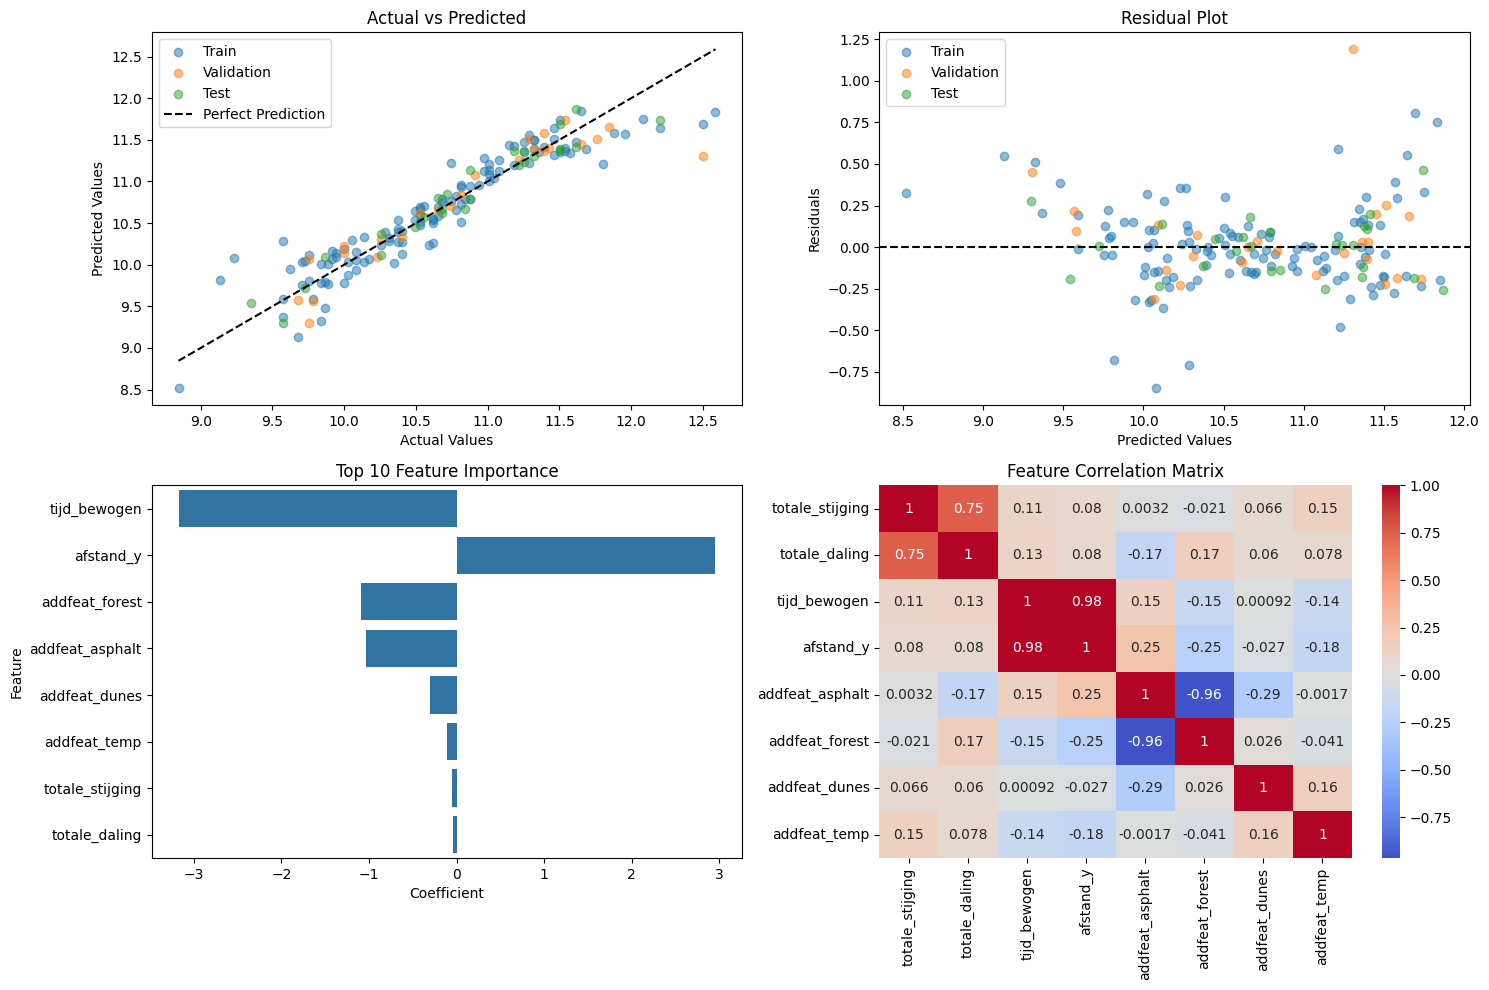


Model Performance:
Train R2: 0.8733
Validation R2: 0.8507
Test R2: 0.9357
Train RMSE: 0.2577
Validation RMSE: 0.2950
Test RMSE: 0.1735

Top 5 Most Important Features:
           Feature  Coefficient
2     tijd_bewogen    -3.175865
3        afstand_y     2.957996
5   addfeat_forest    -1.092714
4  addfeat_asphalt    -1.036051
6    addfeat_dunes    -0.298900


In [340]:
# With your own data
df = garmin_activities_filtered
results = run_multivariate_analysis(df, target_column='gemiddeld_tempo_km/h')
    
# Print results
print("\nModel Performance:")
for metric, value in results['results'].items():
    print(f"{metric}: {value:.4f}")

print("\nTop 5 Most Important Features:")
print(results['importance'].head())

In [ ]:

# Example usage with synthetic data
if __name__ == "__main__":
    # Create synthetic dataset
    np.random.seed(42)
    n_samples = 1000
    
    # Create features
    X_synthetic = pd.DataFrame({
        'afstand_y': np.random.normal(10, 2, n_samples),
        'feature2': np.random.normal(5, 1, n_samples),
        'feature3': np.random.normal(15, 3, n_samples),
        'feature4': np.random.normal(8, 2, n_samples)
    })
    
    # Create target
    y_synthetic = (
        2 * X_synthetic['afstand_y'] +
        0.5 * X_synthetic['feature2'] +
        0.3 * X_synthetic['feature3'] +
        0.1 * X_synthetic['feature4'] +
        np.random.normal(0, 1, n_samples)
    )
    
    # Create DataFrame
    df_synthetic = X_synthetic.copy()
    df_synthetic['gemiddeld_tempo_km/h'] = y_synthetic
    
    # Run analysis
    results = run_multivariate_analysis(
        df=df_synthetic,
        target_column='gemiddeld_tempo_km/h'
    )
    
    # Print results
    print("\nModel Performance:")
    for metric, value in results['results'].items():
        print(f"{metric}: {value:.4f}")
    
    print("\nTop 5 Most Important Features:")
    print(results['importance'].head())

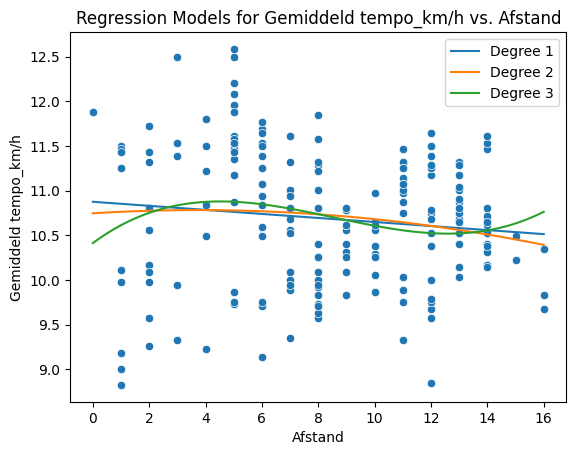

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

garmin_activities_prep = garmin_activities_prep.dropna(subset=['Gemiddeld tempo_km/h'])

# Create a scatter plot of the data
sns.scatterplot(x='Afstand', y='Gemiddeld tempo_km/h', data=garmin_activities_prep)

# Define the polynomial degrees to use
degrees = [1, 2, 3]

# Fit and plot regression lines for each degree
for degree in degrees:
    # Create polynomial features
    X = garmin_activities_prep[['Afstand']]  # Independent variable
    y = garmin_activities_prep['Gemiddeld tempo_km/h']  # Dependent variable

    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit the regression model
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_poly, y)

    # Generate predictions for plotting
    x_range = np.linspace(X.min(), X.max(), 100)
    X_range_poly = poly.transform(x_range.reshape(-1, 1))
    y_pred = model.predict(X_range_poly)

    # Plot the regression line
    plt.plot(x_range, y_pred, label=f'Degree {degree}')

# Set plot labels and legend
plt.xlabel('Afstand')
plt.ylabel('Gemiddeld tempo_km/h')
plt.title('Regression Models for Gemiddeld tempo_km/h vs. Afstand')
plt.legend()
plt.show()

In [ ]:
##################### gemiddeld tempo zit nog in de onderstaande!!

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats

# Drop rows with NaN in 'Gemiddeld tempo_km/h'
garmin_activities_prep = garmin_activities_prep.dropna(subset=['Gemiddeld tempo_km/h'])

# Define the polynomial degrees to use
degrees = [1, 2, 3]

# Create an empty list to store results
results = []

# Fit and evaluate regression models for each degree
for degree in degrees:
    # Create polynomial features
    X = garmin_activities_prep[['Afstand']]
    y = garmin_activities_prep['Gemiddeld tempo_km/h']
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit the regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict on the training data
    y_pred = model.predict(X_poly)

    # Calculate metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)

    # Store results in the list
    results.append([degree, model.intercept_, model.coef_[1:], r2, mse, rmse, mae])

# Create a Pandas DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Degree', 'Intercept', 'Coefficients', 'R-squared', 'MSE', 'RMSE', 'MAE'])

# Display the table
print(results_df)

   Degree  Intercept                                       Coefficients  \
0       1  10.875013                            [-0.022645050103005625]   
1       2  10.746225     [0.019260655098667263, -0.0025870622360633297]   
2       3  10.412154  [0.2342630831931601, -0.03517104580398335, 0.0...   

   R-squared       MSE      RMSE       MAE  
0   0.013820  0.573954  0.757598  0.622380  
1   0.016690  0.572284  0.756494  0.622978  
2   0.030493  0.564251  0.751166  0.621250  


In [ ]:
## multivariate regression

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Drop rows with NaN in 'Gemiddeld tempo_km/h'
garmin_activities_prep = garmin_activities_prep.dropna(subset=['Gemiddeld tempo_km/h'])

# Define the polynomial degrees to use
degrees = [1, 2, 3, 4, 5]

# Define the features for multivariate regression
features = ['Afstand', 'Gem. HS', 'Max. HS', 'Totale stijging',
            'Totale daling', 'Gem. vermogen', 'Max. vermogen']

# Create an empty list to store results
results = []

# Fit and evaluate regression models for each degree
for degree in degrees:
    # Create polynomial features
    X = garmin_activities_prep[features]
    y = garmin_activities_prep['Gemiddeld tempo_km/h']

    # Impute missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Replace with your desired strategy
    X = imputer.fit_transform(X)

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit the regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    #model.fit(X_poly, y)

    # Predict on the training data
    y_pred = model.predict(X_poly)

    # Calculate metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)

    # Store results in the list
    results.append([degree, model.intercept_, model.coef_, r2, mse, rmse, mae])

# Create a Pandas DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Degree', 'Intercept', 'Coefficients', 'R-squared', 'MSE', 'RMSE', 'MAE'])

# Display the table
print(results_df)

   Degree    Intercept                                       Coefficients  \
0       1     0.067409  [0.0, -0.01416184304416588, 0.0443704400577736...   
1       2   -39.230040  [-2.79403062360616e-10, -0.38221085443021763, ...   
2       3   408.016988  [-1.1027039246998816e-10, 6.341068133866765e-0...   
3       4  -333.816343  [6.003441803450292e-11, 4.589916666865481e-10,...   
4       5 -1703.471045  [-1.4036497795983526e-12, -1.917081396578555e-...   

   R-squared           MSE      RMSE       MAE  
0   0.249462  4.368111e-01  0.660917  0.538725  
1   0.383698  3.586863e-01  0.598904  0.467257  
2   0.612582  2.254767e-01  0.474844  0.345089  
3   0.892673  6.246390e-02  0.249928  0.145203  
4   1.000000  1.215171e-11  0.000003  0.000002  


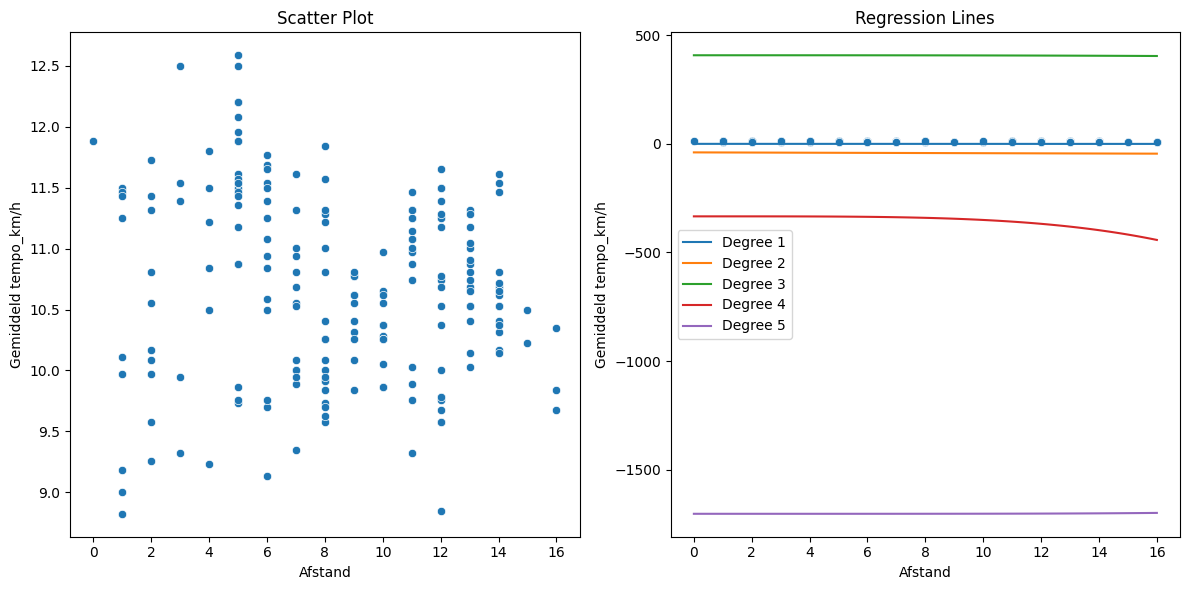

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
from sklearn.impute import SimpleImputer

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Subplot 1: Scatter plot
sns.scatterplot(x='Afstand', y='Gemiddeld tempo_km/h', data=garmin_activities_prep, ax=ax1)
ax1.set_xlabel('Afstand')
ax1.set_ylabel('Gemiddeld tempo_km/h')
ax1.set_title('Scatter Plot')
# Assuming you have the results stored in the 'results' list

# Create a scatter plot of the data (using 'Afstand' as an example for visualization)
sns.scatterplot(x='Afstand', y='Gemiddeld tempo_km/h', data=garmin_activities_prep)

# Define the polynomial degrees to use
degrees = [1, 2, 3,4 ,5]



# Plot regression lines for each degree
for i, degree in enumerate(degrees):
    # Get model parameters from the results list
    intercept = results[i][1]
    coefficients = results[i][2]

    # Generate predictions for plotting (using 'Afstand' as an example)
    x_range = np.linspace(garmin_activities_prep['Afstand'].min(), garmin_activities_prep['Afstand'].max(), 100)
    X_range = np.zeros((len(x_range), len(features)))  # Create a dummy X_range with all features
    X_range[:, 0] = x_range  # Set 'Afstand' values in X_range
   
    # Apply polynomial transformation and predict
    poly = PolynomialFeatures(degree=degree)
    X_range_poly = poly.fit_transform(X_range)
    
    num_coefs = X_range_poly.shape[1]  # Get the number of coefficients needed
    coefs_to_use = coefficients[:num_coefs]  # Select the appropriate coefficients
    
    y_pred = intercept + np.dot(X_range_poly, coefs_to_use)  # Calculate predictions

    # Plot the regression line on ax2
    ax2.plot(x_range, y_pred, label=f'Degree {degree}')

# Set labels and legend for ax2
ax2.set_xlabel('Afstand')
ax2.set_ylabel('Gemiddeld tempo_km/h')
ax2.set_title('Regression Lines')
ax2.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
## there is additional information hidden in title:
### soort ondergrond []
### aantal keer lopen [1, 2]
### Temperatuur []
### Asfalt [0-1]
### Bos [0-1]
### Dunes [0-1]
### Temperatuur
Hartslag
Ondergrond
Hoeveelste keer lopen:


In [206]:
garmin_activities_prep

Titel  Afstand  Gem. HS  Max. HS  \
0                    Waalre Hardlopen     12.0    172.0    183.0   
1                    Waalre Hardlopen     11.0    178.0    186.0   
2              Loon op Zand Hardlopen     10.0    173.0    183.0   
3              Loon op Zand Hardlopen     10.0    176.0    188.0   
4              Loon op Zand Hardlopen     10.0    182.0    191.0   
..                                ...      ...      ...      ...   
221                  Waalre Hardlopen     13.0    180.0    191.0   
222            Heeze-Leende Hardlopen     11.0    179.0    192.0   
223  Bad Lauterberg im Harz Hardlopen      5.0    165.0    182.0   
224  Bad Lauterberg im Harz Hardlopen      6.0    157.0    174.0   
225  Bad Lauterberg im Harz Hardlopen      6.0    159.0    176.0   

     Gemiddeld tempo  Totale stijging  Totale daling  Gem. vermogen  \
0              322.0             13.0           25.0          370.0   
1              328.0             15.0           23.0          357.0   
2              341.0             31.0           34.0          346.0   
3              350.0             35.0           36.0          338.0   
4              358.0             33.0           38.0          333.0   
..               ...              ...            ...            ...   
221            346.0             27.0           11.0            NaN   
222            364.0             14.0            4.0            NaN   
223            369.0             89.0           44.0            NaN   
224            371.0             80.0           67.0            NaN   
225            369.0             86.0           82.0            NaN   

     Max. vermogen Tijd bewogen track_lengths  \
0            460.0     01:01:59            20   
1            458.0     01:02:40            12   
2            570.0     00:57:12            12   
3            521.0     01:00:02            12   
4            513.0     00:58:51            12   
..             ...          ...           ...   
221            NaN     01:12:09            20   
222            NaN     01:08:19            12   
223            NaN     00:31:05             8   
224            NaN     00:34:12             8   
225            NaN     00:34:45             8   

                              Titel_Track  Gemiddeld tempo_km/h  Titel_Numeric  
0                   Waalre Hardlopen - 20             11.180124             10  
1                   Waalre Hardlopen - 12             10.975610             10  
2             Loon op Zand Hardlopen - 12             10.557185              6  
3             Loon op Zand Hardlopen - 12             10.285714              6  
4             Loon op Zand Hardlopen - 12             10.055866              6  
..                                    ...                   ...            ...  
221                 Waalre Hardlopen - 20             10.404624             10  
222           Heeze-Leende Hardlopen - 12              9.890110              4  
223  Bad Lauterberg im Harz Hardlopen - 8              9.756098              0  
224  Bad Lauterberg im Harz Hardlopen - 8              9.703504              0  
225  Bad Lauterberg im Harz Hardlopen - 8              9.756098              0  

[199 rows x 14 columns]

In [ ]:
## checken of de vorige track de eerste in een serie was. 

# Assuming your DataFrame is called 'garmin_activities_prep'
garmin_activities_prep['new_track'] = 'new'  # Initialize the column with 'new'

previous_row = None  # Initialize previous_row to None

for index, row in garmin_activities_prep.iterrows():
    if previous_row is not None:
        # Check if the current row's 'titel' is the same as the previous row's 'titel'
        if row['Titel'] == previous_row['Titel']:
            # Check if the absolute difference in 'afstand' is less than or equal to 1
            if abs(row['Afstand'] - previous_row['Afstand']) <= 1:
                garmin_activities_prep.loc[index, 'new_track'] = 'repeat'

    previous_row = row  # Update previous_row for the next iteration
garmin_activities_prep

Titel  Afstand  Gem. HS  Max. HS  \
0                    Waalre Hardlopen     12.0    172.0    183.0   
1                    Waalre Hardlopen     11.0    178.0    186.0   
2              Loon op Zand Hardlopen     10.0    173.0    183.0   
3              Loon op Zand Hardlopen     10.0    176.0    188.0   
4              Loon op Zand Hardlopen     10.0    182.0    191.0   
..                                ...      ...      ...      ...   
221                  Waalre Hardlopen     13.0    180.0    191.0   
222            Heeze-Leende Hardlopen     11.0    179.0    192.0   
223  Bad Lauterberg im Harz Hardlopen      5.0    165.0    182.0   
224  Bad Lauterberg im Harz Hardlopen      6.0    157.0    174.0   
225  Bad Lauterberg im Harz Hardlopen      6.0    159.0    176.0   

     Gemiddeld tempo  Totale stijging  Totale daling  Gem. vermogen  \
0              322.0             13.0           25.0          370.0   
1              328.0             15.0           23.0          357.0   
2              341.0             31.0           34.0          346.0   
3              350.0             35.0           36.0          338.0   
4              358.0             33.0           38.0          333.0   
..               ...              ...            ...            ...   
221            346.0             27.0           11.0            NaN   
222            364.0             14.0            4.0            NaN   
223            369.0             89.0           44.0            NaN   
224            371.0             80.0           67.0            NaN   
225            369.0             86.0           82.0            NaN   

     Max. vermogen Tijd bewogen track_lengths  \
0            460.0     01:01:59            20   
1            458.0     01:02:40            12   
2            570.0     00:57:12            12   
3            521.0     01:00:02            12   
4            513.0     00:58:51            12   
..             ...          ...           ...   
221            NaN     01:12:09            20   
222            NaN     01:08:19            12   
223            NaN     00:31:05             8   
224            NaN     00:34:12             8   
225            NaN     00:34:45             8   

                              Titel_Track  Gemiddeld tempo_km/h  \
0                   Waalre Hardlopen - 20             11.180124   
1                   Waalre Hardlopen - 12             10.975610   
2             Loon op Zand Hardlopen - 12             10.557185   
3             Loon op Zand Hardlopen - 12             10.285714   
4             Loon op Zand Hardlopen - 12             10.055866   
..                                    ...                   ...   
221                 Waalre Hardlopen - 20             10.404624   
222           Heeze-Leende Hardlopen - 12              9.890110   
223  Bad Lauterberg im Harz Hardlopen - 8              9.756098   
224  Bad Lauterberg im Harz Hardlopen - 8              9.703504   
225  Bad Lauterberg im Harz Hardlopen - 8              9.756098   

     Titel_Numeric new_track  
0               10       new  
1               10    repeat  
2                6       new  
3                6    repeat  
4                6    repeat  
..             ...       ...  
221             10    repeat  
222              4       new  
223              0       new  
224              0    repeat  
225              0    repeat  

[199 rows x 15 columns]

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to visualize correlations
def visualize_correlations(df):

filtered_df = df.loc[:, ~df.columns.str.startswith('titel_')]

    plt.figure(figsize=(20, 16))
    correlation_matrix = df.corr()

    # Create a heatmap
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

    plt.title("Feature Correlation Heatmap")
    plt.show()

# Assuming garmin_activities_prep is already created
visualize_correlations(garmin_activities_prep)


ValueError: could not convert string to float: 'Waalre Hardlopen'

<Figure size 2000x1600 with 0 Axes>

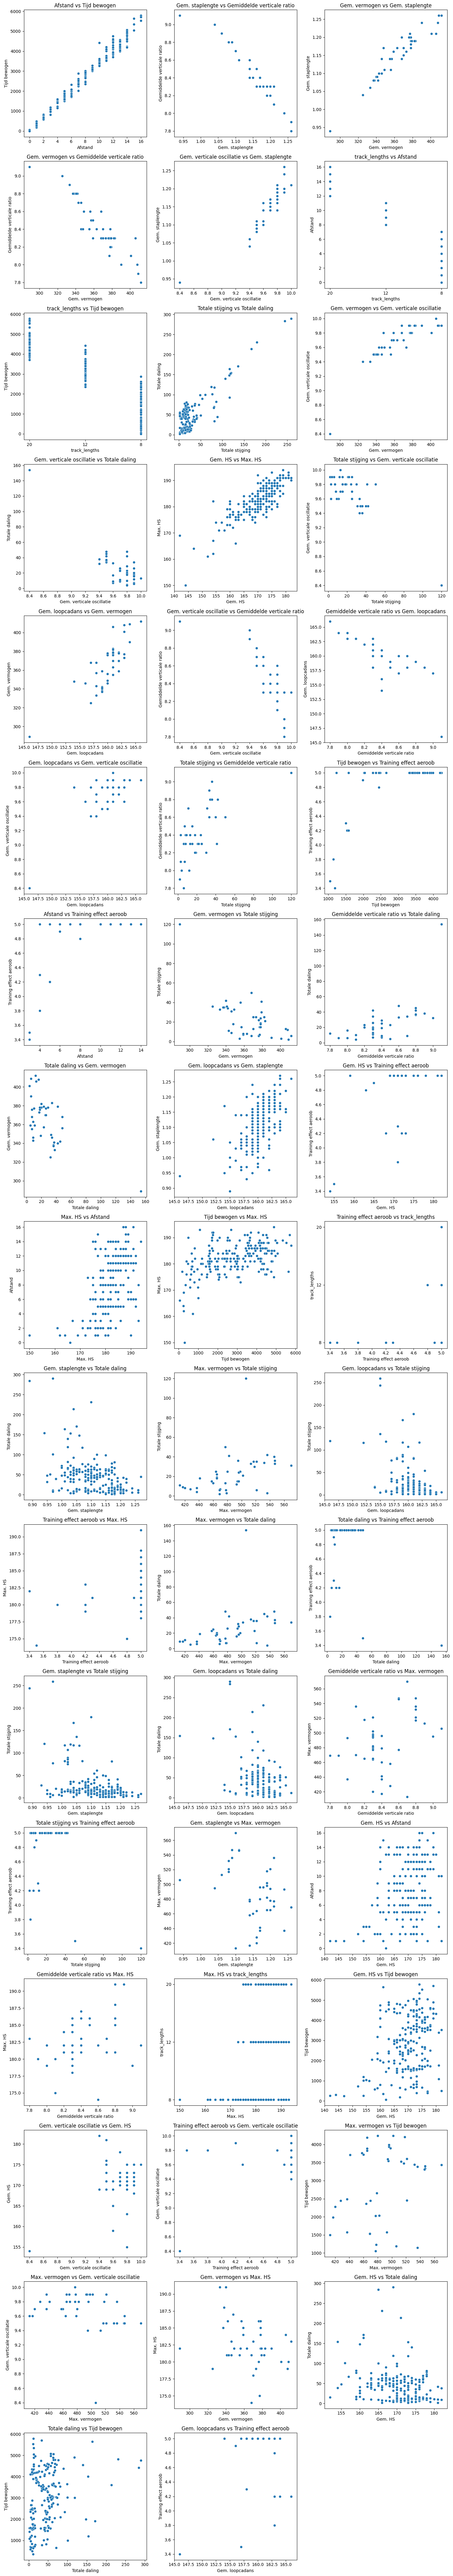

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to plot scatter plots for top correlated features in a 3-column layout
def plot_top_correlations(df, top_n=15, cols_per_row=3):
    # Drop 'titel_' columns
    filtered_df = df.loc[:, ~df.columns.str.startswith('titel_')]

    # Compute correlation matrix and sort by highest absolute correlation
    corr_matrix = filtered_df.corr().abs().unstack().sort_values(ascending=False)
    
    # Remove self-correlations (diagonal values)
    corr_matrix = corr_matrix[corr_matrix < 1].drop_duplicates()

    # Select top N correlated pairs
    top_correlations = corr_matrix.head(top_n).index.tolist()

    # Calculate the number of rows needed
    num_rows = int(np.ceil(top_n / cols_per_row))

    # Create subplots with 3 columns per row
    fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(5 * cols_per_row, 5 * num_rows))
    axes = axes.flatten()  # Flatten for easier iteration

    # Plot scatter plots for each correlated pair
    for i, ((col1, col2), ax) in enumerate(zip(top_correlations, axes)):
        sns.scatterplot(x=df[col1], y=df[col2], ax=ax)
        ax.set_title(f"{col1} vs {col2}")
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)

    # Hide any unused subplots
    for i in range(len(top_correlations), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Call function with your preprocessed dataframe
plot_top_correlations(garmin_activities_prep, top_n=50, cols_per_row=3)


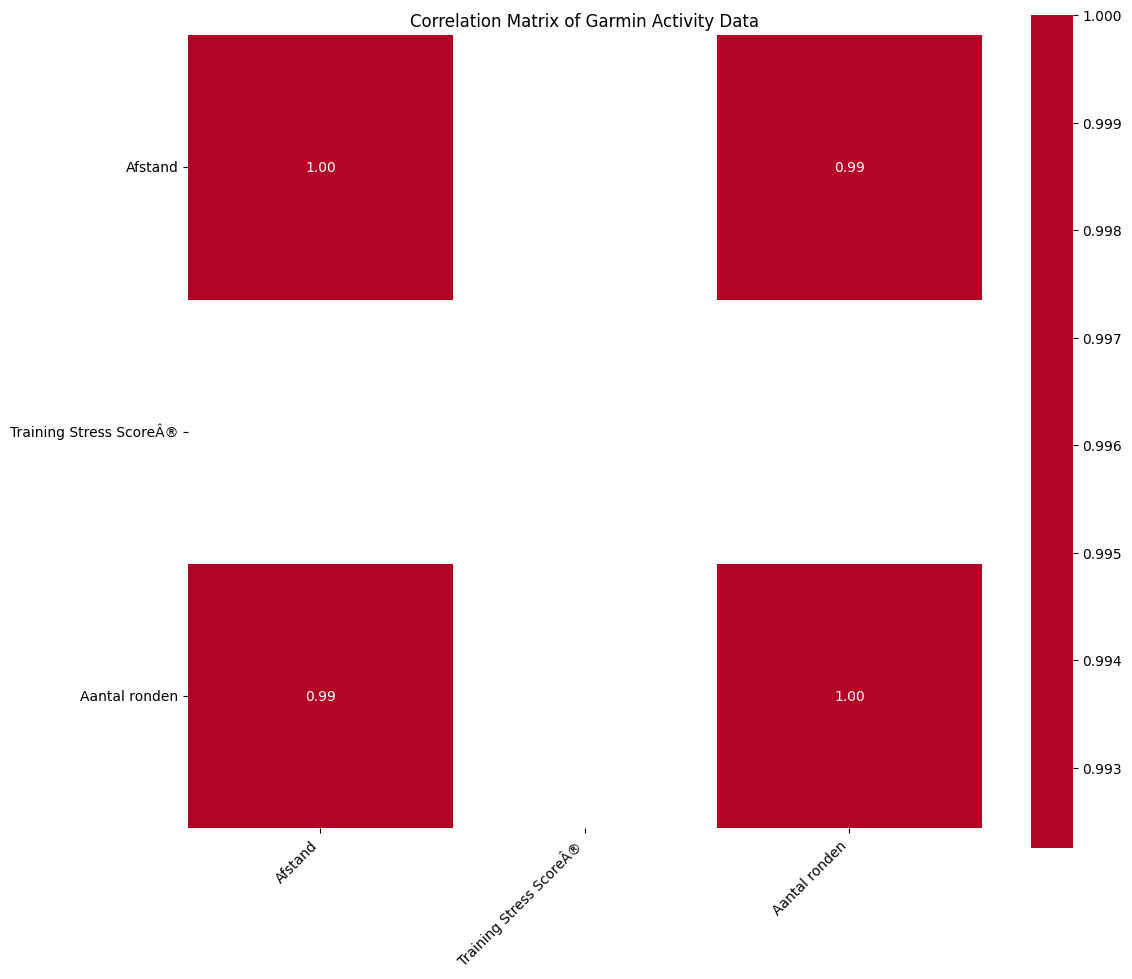

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns and dummy variables
numeric_df = garmin_activities_csv.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Create correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Blue-red diverging colormap
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format correlation values to 2 decimal places
            square=True)  # Make cells square
plt.title('Correlation Matrix of Garmin Activity Data')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns and dummy variables
numeric_df = garmin_activities_csv.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Create correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Blue-red diverging colormap
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format correlation values to 2 decimal places
            square=True)  # Make cells square
plt.title('Correlation Matrix of Garmin Activity Data')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [55]:
garmin_activities_prep.dtypes

Titel                          object
Afstand                       float64
Tijd                           object
Gem. HS                        object
Max. HS                        object
Training effect aeroob         object
Gem. loopcadans                object
Max. loopcadans                object
Beste tempo                    object
Totale stijging                object
Totale daling                  object
Gem. staplengte                object
Gemiddelde verticale ratio     object
Gem. verticale oscillatie      object
Gem. grondcontacttijd          object
Gem. GAP                       object
Normalized PowerÂ® (NPÂ®)      object
Training Stress ScoreÂ®       float64
Gem. vermogen                  object
Max. vermogen                  object
Decompressie                   object
Tijd bewogen                   object
Verstreken tijd                object
Minimum hoogte                 object
Maximum hoogte                 object
track_lengths                  object
dtype: objec

In [ ]:
[Beste tempo ,Tijd bewogen,Verstreken tijd, Gem. grondcontacttijd] is hh:mm:ss-format, Titel is text, the rest are numbers

In [49]:
#### visualisaties maken

Index(['Activiteittype', 'Datum', 'Favoriet', 'Titel', 'Afstand', 'CalorieÃ«n',
       'Tijd', 'Gem. HS', 'Max. HS', 'Training effect aeroob',
       'Gem. loopcadans', 'Max. loopcadans', 'Gemiddeld tempo', 'Beste tempo',
       'Totale stijging', 'Totale daling', 'Gem. staplengte',
       'Gemiddelde verticale ratio', 'Gem. verticale oscillatie',
       'Gem. grondcontacttijd', 'Gem. GAP', 'Normalized PowerÂ® (NPÂ®)',
       'Training Stress ScoreÂ®', 'Gem. vermogen', 'Max. vermogen',
       'Decompressie', 'Beste rondetijd', 'Aantal ronden', 'Tijd bewogen',
       'Verstreken tijd', 'Minimum hoogte', 'Maximum hoogte', 'track_lengths'],
      dtype='object')

In [14]:
def import_bad_tracks(dict, garmin_activities):

    lst_tracks = list(dict.keys())

    csv_path = os.path.join('C:/Users/michel.marien_icarew/Documents/GitHub/Machine-learning/docs/', 'Garmin_activity_description.csv')

    with open(csv_path, 'r') as csv_file:
        garmin_activities = pd.read_csv(csv_file,
                                        sep=';',
                                        encoding='utf-8')

    garmin_non_running_act = garmin_activities.loc[garmin_activities['Activiteittype'] != 'Hardlopen',['Datum']]

    print(garmin_non_running_act['Datum'])

    updated_datetime_list = [

    (pd.to_datetime(dt_str, format='%Y-%m-%dT%H_%M_%S', errors='coerce') + pd.Timedelta(hours=2)).strftime('%Y-%m-%dT%H_%M_%S')
    if pd.to_datetime(dt_str, format='%Y-%m-%dT%H_%M_%S', errors='coerce') is not pd.NaT
    else None
    for dt_str in lst_tracks]

    garmin_non_running_act = garmin_non_running_act['Datum'].tolist()

    garmin_non_running_act = [x.replace(' ','T') for x in garmin_non_running_act]

    garmin_non_running_act = [x.replace(':','_') for x in garmin_non_running_act]

    garmin_non_running_act = [

    (pd.to_datetime(dt_str, format='%Y-%m-%dT%H_%M_%S', errors='coerce') - pd.Timedelta(hours=2)).strftime('%Y-%m-%dT%H_%M_%S')
    if pd.to_datetime(dt_str, format='%Y-%m-%dT%H_%M_%S', errors='coerce') is not pd.NaT
    else None
    for dt_str in garmin_non_running_act]

    garmin_non_running_act = garmin_non_running_act[::-1]

    return garmin_non_running_act

lst_non_running_tracks = import_bad_tracks(dict_json_details, garmin_activities_prep)

152    14-10-2021 17:36
153    10-10-2021 17:14
154     6-10-2021 16:49
155     30-9-2021 16:55
157     21-9-2021 16:59
160      9-9-2021 17:43
161      7-9-2021 16:58
169     11-8-2021 17:33
Name: Datum, dtype: object


In [15]:
def remove_bad_tracks(dict_details, list_bad_tracks):
        
    true_tracks = {track: df for track, df in dict_details.items() if track not in list_bad_tracks}
              
    return true_tracks

lst_only_tracks = remove_bad_tracks(dict_json_details,lst_non_running_tracks)

print(len(lst_only_tracks))


193


In [35]:
dict_json_details[1]

KeyError: 1

In [16]:

def flatten_track_info(json_dict):
    
    lst_flattened_tracks = []

    lst_bad_tracks = []
    
    lst_tracks = list(json_dict.keys())

    for track in lst_tracks:

        #print(track)

        df_track = pd.DataFrame.from_dict(json_dict[track])

        df_detailmetrics = pd.DataFrame.from_dict(df_track['activityDetailMetrics'][0])

        if df_track['metricDescriptors'][0] is not None:
            
            lst_metricDescriptors = list(pd.DataFrame.from_dict(df_track['metricDescriptors'][0])['key'])

            df_track.drop(['activityDetailMetrics', 'metricDescriptors'], axis = 1, inplace = True)

            df_detailmetrics_split = pd.DataFrame(df_detailmetrics['metrics'].to_list(), columns = lst_metricDescriptors)

            df_track = pd.concat([df_track]*len(df_detailmetrics_split), ignore_index=True)

            df_track = pd.concat([df_track, df_detailmetrics_split], axis = 1)

            if 'geoPolylineDTO.polyline' in df_track.columns:

                df_geoPolylineDTO_polyline = pd.DataFrame.from_dict(df_track['geoPolylineDTO.polyline'][0])

                #print(df_geoPolylineDTO_polyline)

                df_complete_track = pd.merge(
                    left = df_track, 
                    right = df_geoPolylineDTO_polyline,
                    how="outer",
                    left_on=['directTimestamp', 'directLongitude'],
                    right_on=['time', 'lon'],
                )

                df_complete_track = df_complete_track.drop(columns=['geoPolylineDTO.polyline'])

                lst_flattened_tracks.append(df_complete_track)

            else:

                print(f'{track} has no geoPolylineDTO.polyline and will be removed from the dictionary')

                lst_bad_tracks.append(track)

                #df_complete_track = df_track  

        else:

            print(f'{track} has no metricDescriptors and will be removed from the dictionary')

            lst_bad_tracks.append(track)
     
        

    #df_flattened_tracks = pd.concat(lst_flattened_tracks)

    #df_flattened_tracks_2 = pd.DataFrame.dropna(df_flattened_tracks, axis=1, how='all', inplace=False)

    return lst_flattened_tracks


lst_flatten_tracks = flatten_track_info(lst_only_tracks)

2020-12-24T09_12_34 has no geoPolylineDTO.polyline and will be removed from the dictionary
2021-07-12T06_12_45 has no metricDescriptors and will be removed from the dictionary
2021-07-31T13_21_47 has no geoPolylineDTO.polyline and will be removed from the dictionary
2021-08-11T15_33_46 has no geoPolylineDTO.polyline and will be removed from the dictionary
2021-09-07T14_58_47 has no geoPolylineDTO.polyline and will be removed from the dictionary
2021-09-30T14_55_10 has no geoPolylineDTO.polyline and will be removed from the dictionary
2021-10-06T14_49_26 has no geoPolylineDTO.polyline and will be removed from the dictionary
2021-10-10T15_14_29 has no geoPolylineDTO.polyline and will be removed from the dictionary
2021-10-14T15_36_50 has no geoPolylineDTO.polyline and will be removed from the dictionary
2023-08-29T14_13_57 has no geoPolylineDTO.polyline and will be removed from the dictionary
2024-01-24T16_47_18 has no geoPolylineDTO.polyline and will be removed from the dictionary
2024-

In [17]:
len(lst_flatten_tracks)

163

In [ ]:
lst_flatten_tracks

In [18]:
#list(lst_flatten_tracks[0].dtypes)

df = pd.DataFrame(lst_flatten_tracks[140])

# Function to check if the column contains unhashable types
def is_hashable(x):
    try:
        hash(x)  # Try to hash the element
        return True
    except TypeError:  # TypeError is raised for unhashable types
        return False

# Check each column for non-hashable types
non_hashable_columns = [col for col in df.columns if not df[col].apply(is_hashable).all()]

print("Non-hashable columns:", non_hashable_columns)

Non-hashable columns: []


In [19]:
segment_length = 250

# columns to drop
lst_drop_columns = ['detailsAvailable',
               'measurementCount', 
               'metricsCount',
               'geoPolylineDTO.startPoint.timerStart',
               'geoPolylineDTO.startPoint.timerStop',
               'geoPolylineDTO.startPoint.extendedCoordinate',
               'geoPolylineDTO.startPoint.valid',
               'geoPolylineDTO.startPoint.speed',
               'geoPolylineDTO.endPoint.timerStart',
               'geoPolylineDTO.endPoint.timerStop',
               'geoPolylineDTO.endPoint.extendedCoordinate',
               'geoPolylineDTO.endPoint.valid',
               'geoPolylineDTO.endPoint.speed',
               'timerStart', 
               'timerStop',
               'directFractionalCadence',
               'directVerticalSpeed',
               'extendedCoordinate',
               'directSpeed',
               'directHeartRate', 
               'directTimestamp',
               'directElevation',
               'directLongitude',
               'directLatitude',
               'sumDuration',
               'sumElapsedDuration',
               'directRunCadence',
               'directDoubleCadence',
               'geoPolylineDTO.maxLon',
               'geoPolylineDTO.minLon',
               'geoPolylineDTO.maxLat',
               'geoPolylineDTO.minLat',
               'sumDistance',
               'sumMovingDuration']

In [20]:
def aggregate_garmin_details(df,lst_columns_to_drop, segment_length):
    ''' Aggregate track data from track points to track segments'''

    # remove bad readings
    #df = df[df['speed'] != 0.0]
    df = pd.DataFrame.dropna(df, axis=1, how='all', inplace = False)

    # calculate track segment and aggregate data
    df['quarter_km_bin'] = (df['sumDistance'] // segment_length) + 1
    df['bin_length_in_bin'] = ((df['sumDistance'] / segment_length) - (df['sumDistance'] // segment_length)).round(2)

    df['bin_length_in_bin'] = df.groupby('quarter_km_bin')['bin_length_in_bin'].transform('max')
    df['bin_speed_mean'] = df.groupby('quarter_km_bin')['directSpeed'].transform('mean').round(2)
    df['bin_heartrate_mean'] = df.groupby('quarter_km_bin')['directHeartRate'].transform('mean').round(0)
    df['bin_timestamp_max'] = df.groupby('quarter_km_bin')['directTimestamp'].transform('max').round(0)
    df['bin_duration_sum'] = df.groupby('quarter_km_bin')['sumDuration'].transform('max').round(0)
    df['bin_height_diff'] = df.groupby('quarter_km_bin')['directElevation'].transform('max').round(2) - df.groupby('quarter_km_bin')['directElevation'].transform('min').round(2)
    df['bin_start_lat']= df.groupby('quarter_km_bin')['directLongitude'].transform('first')
    df['bin_start_long']= df.groupby('quarter_km_bin')['directLatitude'].transform('first')
    df['bin_end_long']= df.groupby('quarter_km_bin')['directLatitude'].transform('last')
    df['bin_end_lat']= df.groupby('quarter_km_bin')['directLongitude'].transform('last')

    # drop columns with detailed/non-informative information
    df_aggregated = df.drop(lst_columns_to_drop, errors='ignore', axis =1)

    # make sure every track segment has only 2 rows
    df_aggregated.drop_duplicates(inplace=True)

    return df_aggregated

In [22]:
def pivot_dataframe(long_df):
    ''' transform long df to wide df '''

    bin_columns = long_df.filter(regex='^bin_').columns.tolist()
    non_bin_columns = long_df.filter(regex='^(?!.*bin).*').columns.tolist()

    pivot_df = long_df.melt(id_vars=['quarter_km_bin'], value_vars=bin_columns)

    pivot_df = pivot_df.pivot_table(index=None, columns=['quarter_km_bin', 'variable'], values='value', aggfunc='first')

    pivot_df.columns = [f'{group}_{var}' for group, var in pivot_df.columns]

    non_bin_df = long_df[non_bin_columns].iloc[:1].reset_index(drop=True)

    pivot_df = pivot_df.reset_index(drop=True)

    pivot_df = pd.concat([non_bin_df, pivot_df], axis=1)

    pivot_df.reset_index(drop=True, inplace=True)

    return pivot_df

In [23]:
track_agg = lst_flatten_tracks[21]

In [24]:
# remove bad readings
#track_agg = track_agg[track_agg['speed'] != 0.0]
track_agg = df.drop(['speed','lat', 'lon','time'], errors='ignore', axis =1)


In [27]:
import warnings
warnings.simplefilter(action='ignore')

lst_all_tracks = []
lst_all_measurements = []

for i, track in enumerate(lst_flatten_tracks):
    
    #print(i, )

    #if i in [10, 11, 12, 14, 15, 17, 22]:

        #print(track)
        
        #continue

   # else:

    track_agg = aggregate_garmin_details(lst_flatten_tracks[i],lst_drop_columns, segment_length)

    track_agg_w = pivot_dataframe(track_agg)

    lst_all_tracks.append(track_agg_w)

    lst_all_measurements.append(list(track_agg_w.columns))

# determine max number of columns
longest_item = max(lst_all_measurements, key=len)
longest_item_index = lst_all_measurements.index(longest_item)

# Ensure each DataFrame in lst_all_tracks is 2D and has consistent columns
for i in range(len(lst_all_tracks)):
    # If a DataFrame has an extra dimension, flatten it
    if len(lst_all_tracks[i].shape) > 2:
        print(f'{i} has more than 2 dimensions')
        lst_all_tracks[i] = lst_all_tracks[i].reshape(lst_all_tracks[i].shape[0], -1)
    
    # Add missing columns (if any) to match the longest_item column structure
    missing_cols = set(longest_item) - set(lst_all_tracks[i].columns)
    
    # Create a DataFrame with missing columns filled with NaN values
    missing_data = pd.DataFrame({col: [np.nan] * lst_all_tracks[i].shape[0] for col in missing_cols})
    
    # Concatenate the missing columns all at once
    lst_all_tracks[i] = pd.concat([lst_all_tracks[i], missing_data], axis=1)

    # Reorder the columns to match the longest_item order
    lst_all_tracks[i] = lst_all_tracks[i][longest_item]

# Now, create the final DataFrame
df_all_tracks = pd.DataFrame(columns=longest_item)

for i, item in enumerate(lst_all_tracks):

    df_all_tracks = pd.concat([df_all_tracks, item], axis = 0)


In [28]:
df_all_tracks

activityId  geoPolylineDTO.startPoint.lat  \
0   5.600439e+09                      51.618927   
0   5.600441e+09                      51.618800   
0   5.600443e+09                      51.620453   
0   5.600445e+09                      51.394049   
0   5.600450e+09                      51.393344   
..           ...                            ...   
0   1.741210e+10                      51.649699   
0   1.746775e+10                      51.650110   
0   1.757541e+10                      51.649692   
0   1.763055e+10                      51.652956   
0   1.768256e+10                      51.651448   

    geoPolylineDTO.startPoint.lon  geoPolylineDTO.startPoint.time  \
0                       10.487889                    1.596553e+12   
0                       10.487701                    1.596641e+12   
0                       10.480991                    1.596813e+12   
0                        5.525923                    1.598541e+12   
0                        5.495704                    1.600344e+12   
..                            ...                             ...   
0                        5.072091                    1.730214e+12   
0                        5.073316                    1.730819e+12   
0                        5.072224                    1.732029e+12   
0                        5.071455                    1.732633e+12   
0                        5.071468                    1.733238e+12   

    geoPolylineDTO.endPoint.lat  geoPolylineDTO.endPoint.lon  \
0                     51.616517                    10.491354   
0                     51.616402                    10.491294   
0                     51.617012                    10.490371   
0                     51.398866                     5.493528   
0                     51.342528                     5.476503   
..                          ...                          ...   
0                     51.656419                     5.071254   
0                     51.656432                     5.071234   
0                     51.656332                     5.071282   
0                     51.656948                     5.071362   
0                     51.656121                     5.071319   

    geoPolylineDTO.endPoint.time        lat        lon          time  ...  \
0                   1.596556e+12  51.618927  10.487889  1.596553e+12  ...   
0                   1.596643e+12  51.618800  10.487701  1.596641e+12  ...   
0                   1.596815e+12  51.620453  10.480991  1.596813e+12  ...   
0                   1.598544e+12        NaN        NaN           NaN  ...   
0                   1.600348e+12  51.393344   5.495704  1.600344e+12  ...   
..                           ...        ...        ...           ...  ...   
0                   1.730218e+12  51.649699   5.072091  1.730214e+12  ...   
0                   1.730823e+12  51.650110   5.073316  1.730819e+12  ...   
0                   1.732032e+12  51.649692   5.072224  1.732029e+12  ...   
0                   1.732637e+12  51.652956   5.071455  1.732633e+12  ...   
0                   1.733241e+12  51.651448   5.071468  1.733238e+12  ...   

    63.0_bin_duration_sum 63.0_bin_end_lat  63.0_bin_end_long  \
0                     NaN              NaN                NaN   
0                     NaN              NaN                NaN   
0                     NaN              NaN                NaN   
0                     NaN              NaN                NaN   
0                     NaN              NaN                NaN   
..                    ...              ...                ...   
0                     NaN              NaN                NaN   
0                     NaN              NaN                NaN   
0                     NaN              NaN                NaN   
0                     NaN              NaN                NaN   
0                     NaN              NaN                NaN   

    63.0_bin_heartrate_mean  63.0_bin_height_diff  63.0_bin_length_in_bin  \
0           

In [29]:
lengte = 0

for i, item in enumerate(lst_all_measurements):

    if len(item) > lengte:

        idx = i

        lengte = len(item)


print(idx, lengte)

print(lst_all_measurements[36])

5 642
['activityId', 'geoPolylineDTO.startPoint.lat', 'geoPolylineDTO.startPoint.lon', 'geoPolylineDTO.startPoint.time', 'geoPolylineDTO.endPoint.lat', 'geoPolylineDTO.endPoint.lon', 'geoPolylineDTO.endPoint.time', 'lat', 'lon', 'time', 'speed', 'valid', '1.0_bin_duration_sum', '1.0_bin_end_lat', '1.0_bin_end_long', '1.0_bin_heartrate_mean', '1.0_bin_height_diff', '1.0_bin_length_in_bin', '1.0_bin_speed_mean', '1.0_bin_start_lat', '1.0_bin_start_long', '1.0_bin_timestamp_max', '2.0_bin_duration_sum', '2.0_bin_end_lat', '2.0_bin_end_long', '2.0_bin_heartrate_mean', '2.0_bin_height_diff', '2.0_bin_length_in_bin', '2.0_bin_speed_mean', '2.0_bin_start_lat', '2.0_bin_start_long', '2.0_bin_timestamp_max', '3.0_bin_duration_sum', '3.0_bin_end_lat', '3.0_bin_end_long', '3.0_bin_heartrate_mean', '3.0_bin_height_diff', '3.0_bin_length_in_bin', '3.0_bin_speed_mean', '3.0_bin_start_lat', '3.0_bin_start_long', '3.0_bin_timestamp_max', '4.0_bin_duration_sum', '4.0_bin_end_lat', '4.0_bin_end_long', '

In [30]:
longest_item = max(lst_all_measurements, key=len)
longest_item_index = lst_all_measurements.index(longest_item)

print(longest_item_index, longest_item)

5 ['activityId', 'geoPolylineDTO.startPoint.lat', 'geoPolylineDTO.startPoint.lon', 'geoPolylineDTO.startPoint.time', 'geoPolylineDTO.endPoint.lat', 'geoPolylineDTO.endPoint.lon', 'geoPolylineDTO.endPoint.time', 'lat', 'lon', 'time', 'speed', 'valid', '1.0_bin_duration_sum', '1.0_bin_end_lat', '1.0_bin_end_long', '1.0_bin_heartrate_mean', '1.0_bin_height_diff', '1.0_bin_length_in_bin', '1.0_bin_speed_mean', '1.0_bin_start_lat', '1.0_bin_start_long', '1.0_bin_timestamp_max', '2.0_bin_duration_sum', '2.0_bin_end_lat', '2.0_bin_end_long', '2.0_bin_heartrate_mean', '2.0_bin_height_diff', '2.0_bin_length_in_bin', '2.0_bin_speed_mean', '2.0_bin_start_lat', '2.0_bin_start_long', '2.0_bin_timestamp_max', '3.0_bin_duration_sum', '3.0_bin_end_lat', '3.0_bin_end_long', '3.0_bin_heartrate_mean', '3.0_bin_height_diff', '3.0_bin_length_in_bin', '3.0_bin_speed_mean', '3.0_bin_start_lat', '3.0_bin_start_long', '3.0_bin_timestamp_max', '4.0_bin_duration_sum', '4.0_bin_end_lat', '4.0_bin_end_long', '4.0_

In [32]:
lengte = 0

lst_all_measurements.sort(reverse=True)
print(lst_all_measurements)
last_item = lst_all_measurements.sort(reverse=True)
last_item #= last_item[-1]

[['activityId', 'geoPolylineDTO.startPoint.lat', 'geoPolylineDTO.startPoint.lon', 'geoPolylineDTO.startPoint.time', 'geoPolylineDTO.endPoint.lat', 'geoPolylineDTO.endPoint.lon', 'geoPolylineDTO.endPoint.time', 'sumAccumulatedPower', 'directVerticalRatio', 'directPower', 'directVerticalOscillation', 'directGradeAdjustedSpeed', 'directStrideLength', 'directGroundContactTime', 'directBodyBattery', 'directPerformanceCondition', 'lat', 'lon', 'time', 'speed', 'valid', '1.0_bin_duration_sum', '1.0_bin_end_lat', '1.0_bin_end_long', '1.0_bin_heartrate_mean', '1.0_bin_height_diff', '1.0_bin_length_in_bin', '1.0_bin_speed_mean', '1.0_bin_start_lat', '1.0_bin_start_long', '1.0_bin_timestamp_max', '2.0_bin_duration_sum', '2.0_bin_end_lat', '2.0_bin_end_long', '2.0_bin_heartrate_mean', '2.0_bin_height_diff', '2.0_bin_length_in_bin', '2.0_bin_speed_mean', '2.0_bin_start_lat', '2.0_bin_start_long', '2.0_bin_timestamp_max', '3.0_bin_duration_sum', '3.0_bin_end_lat', '3.0_bin_end_long', '3.0_bin_heartr

In [ ]:
#!pip install geopy
from geopy.distance import geodesic
from sklearn.cluster import DBSCAN


# Function to calculate pairwise distances between start and end points of segments
def calculate_distances(aa):
    distances = []
    for i, row1 in aa.iterrows():
        row_distances = []
        for j, row2 in aa.iterrows():
            dist = geodesic((row1['directLatitude'], row1['directLongitude']), (row2['directLatitude'], row2['directLongitude'])).meters
            row_distances.append(dist)
        distances.append(row_distances)
    return distances

# Group the DataFrame into segments (e.g., 1 kilometer segments)
# Here, we assume that each row represents a 1-meter segment and we're grouping them into kilometers
segment_length = 1000  # 1 kilometer
num_segments = len(aa) // segment_length  # How many 1km segments we have

# Create a list of start and end points for each kilometer segment
segments = []
for i in range(num_segments):
    start_point = aa.iloc[i * segment_length]  # First point in segment
    end_point = aa.iloc[(i + 1) * segment_length - 1]  # Last point in segment
    segments.append((start_point, end_point))

# Create a DataFrame of the start and end points of each segment
segment_aa= pd.DataFrame(segments, columns=['start', 'end'])

# Now calculate the distances between the start and end points of each segment
start_points = segment_aa['start'].apply(lambda x: (x['directLatitude'], x['directLongitude'])).tolist()
end_points = segment_aa['end'].apply(lambda x: (x['directLatitude'], x['directLongitude'])).tolist()

# Calculate pairwise distances between the start and end points
distances = []
for start, end in zip(start_points, end_points):
    distances.append(geodesic(start, end).meters)

# Apply DBSCAN to group the segments based on the calculated distances
db = DBSCAN(eps=25, min_samples=2, metric='precomputed')
segment_aa['cluster'] = db.fit_predict(distances)

# Add cluster labels to the original DataFrame
aa['cluster'] = segment_aa['cluster'].repeat(segment_length)[:len(aa)]  # Repeat cluster labels back to original DataFrame

print(aa)


In [ ]:

for i in aa.index:

    if pd.isna(aa.iloc[i, 0]):

        print('dsf')



    if i >0 and i < aa.shape[0]-1:

        #print(f"Enumerate index: {i}, Row data:{aa.iloc[i,:]}")


# Filter columns where the number of unique values is greater than 1
#ab = aa.loc[:, aa.nunique() > 1]

In [137]:
aa.columns

Index(['activityId', 'measurementCount', 'metricsCount', 'detailsAvailable',
       'geoPolylineDTO.startPoint.lat', 'geoPolylineDTO.startPoint.lon',
       'geoPolylineDTO.startPoint.time',
       'geoPolylineDTO.startPoint.timerStart',
       'geoPolylineDTO.startPoint.timerStop',
       'geoPolylineDTO.startPoint.speed',
       'geoPolylineDTO.startPoint.extendedCoordinate',
       'geoPolylineDTO.startPoint.valid', 'geoPolylineDTO.endPoint.lat',
       'geoPolylineDTO.endPoint.lon', 'geoPolylineDTO.endPoint.time',
       'geoPolylineDTO.endPoint.timerStart',
       'geoPolylineDTO.endPoint.timerStop', 'geoPolylineDTO.endPoint.speed',
       'geoPolylineDTO.endPoint.extendedCoordinate',
       'geoPolylineDTO.endPoint.valid', 'geoPolylineDTO.minLat',
       'geoPolylineDTO.maxLat', 'geoPolylineDTO.minLon',
       'geoPolylineDTO.maxLon', 'directHeartRate', 'directTimestamp',
       'directDoubleCadence', 'directLongitude', 'directElevation',
       'directRunCadence', 'sumElapsedDur

In [115]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [ ]:
df['Distance'] = haversine(df['Latitude'].shift(), df['Longitude'].shift(), df['Latitude'], df['Longitude'])

In [114]:
import numpy as np

def calculate_distances(df_track):

    updated_tracklist = []

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers. 

    df['Distance'] = haversine(df['Latitude'].shift(), df['Longitude'].shift(), df['Latitude'], df['Longitude'])
    return c * r


    return updated_tracklist

bb = calculate_distances(lst_flatten_tracks[0])

In [ ]:




df_track = pd.concat([df_track, df_detailmetrics_split], axis = 1)

df_geoPolylineDTO_polyline = pd.DataFrame.from_dict(df_track['geoPolylineDTO.polyline'][0])

df_complete_track = pd.merge(
    left = df_track, 
    right = df_geoPolylineDTO_polyline,
    how="outer",
    left_on=['directTimestamp', 'directLongitude'],
    right_on=['time', 'lon'],
)


0      1.596553e+12
1      1.596553e+12
2      1.596553e+12
3      1.596553e+12
4      1.596553e+12
           ...     
252    1.596556e+12
253    1.596556e+12
254    1.596556e+12
255    1.596556e+12
256    1.596556e+12
Name: directTimestamp, Length: 257, dtype: float64

In [44]:
df_track.columns

Index(['activityId', 'measurementCount', 'metricsCount', 'heartRateDTOs',
       'pendingData', 'detailsAvailable', 'geoPolylineDTO.startPoint.lat',
       'geoPolylineDTO.startPoint.lon', 'geoPolylineDTO.startPoint.altitude',
       'geoPolylineDTO.startPoint.time',
       'geoPolylineDTO.startPoint.timerStart',
       'geoPolylineDTO.startPoint.timerStop',
       'geoPolylineDTO.startPoint.distanceFromPreviousPoint',
       'geoPolylineDTO.startPoint.distanceInMeters',
       'geoPolylineDTO.startPoint.speed',
       'geoPolylineDTO.startPoint.cumulativeAscent',
       'geoPolylineDTO.startPoint.cumulativeDescent',
       'geoPolylineDTO.startPoint.extendedCoordinate',
       'geoPolylineDTO.startPoint.valid', 'geoPolylineDTO.endPoint.lat',
       'geoPolylineDTO.endPoint.lon', 'geoPolylineDTO.endPoint.altitude',
       'geoPolylineDTO.endPoint.time', 'geoPolylineDTO.endPoint.timerStart',
       'geoPolylineDTO.endPoint.timerStop',
       'geoPolylineDTO.endPoint.distanceFromPrevious

In [42]:
#df_track['geoPolylineDTO.polyline']

df_geoPolylineDTO_polyline = pd.DataFrame.from_dict(df_track['geoPolylineDTO.polyline'][0])
df_geoPolylineDTO_polyline.dtypes

lat                          float64
lon                          float64
altitude                      object
time                           int64
timerStart                      bool
timerStop                       bool
distanceFromPreviousPoint     object
distanceInMeters              object
speed                        float64
cumulativeAscent              object
cumulativeDescent             object
extendedCoordinate              bool
valid                           bool
dtype: object

In [52]:
df_complete_track = pd.merge(
    left = df_track, 
    right = df_geoPolylineDTO_polyline,
    how="outer",
    left_on=['directTimestamp', 'directLongitude'],
    right_on=['time', 'lon'],
)

aaa = df_complete_track.loc[:,['directTimestamp','time']]
aaa

directTimestamp          time
0       1.596553e+12  1.596553e+12
1       1.596553e+12           NaN
2       1.596553e+12  1.596553e+12
3       1.596553e+12           NaN
4                NaN  1.596553e+12
..               ...           ...
374     1.596556e+12  1.596556e+12
375     1.596556e+12           NaN
376     1.596556e+12  1.596556e+12
377     1.596556e+12           NaN
378     1.596556e+12  1.596556e+12

[379 rows x 2 columns]

In [122]:
for key in dict_json_details_keys:

    aa = dict_json_details[dict_json_details_keys[key]]


    

dict_json_details_keys 
aa = dict_json_details[dict_json_details_keys[0]]

ab = pd.DataFrame.from_dict(aa['metricDescriptors'][0])
len(ab)

TypeError: list indices must be integers or slices, not str

In [177]:
#ab = pd.DataFrame.from_dict(aa['metricDescriptors'][0])

#aa = dict_json_details[dict_json_details_keys[0]]
ab = pd.DataFrame.from_dict(aa['activityDetailMetrics'][0])
ab['metrics'][256]
#print(len(list(pd.DataFrame.from_dict(aa['metricDescriptors'][0])['key'])),len(ab['metrics'][0]) )

[176.0,
 1596555547000.0,
 150.0,
 10.491353943943977,
 371.3999938964844,
 75.0,
 2086.0,
 0.0,
 2086.0,
 5657.0,
 2.556999921798706,
 51.616517286747694,
 2086.0,
 0.0]

In [148]:
list(pd.DataFrame.from_dict(aa['metricDescriptors'][0])['key'])

['directHeartRate',
 'directTimestamp',
 'directDoubleCadence',
 'directLongitude',
 'directElevation',
 'directRunCadence',
 'sumElapsedDuration',
 'directFractionalCadence',
 'sumDuration',
 'sumDistance',
 'directSpeed',
 'directLatitude',
 'sumMovingDuration',
 'directVerticalSpeed']

In [1]:
aa = dict_json_details[dict_json_details_keys[0]]
aa_keys = list(pd.DataFrame.from_dict(aa['metricDescriptors'][0])['key'])

#split column of lists into two new columns
split = pd.DataFrame(ab['metrics'].to_list(), columns = aa_keys)

split

NameError: name 'dict_json_details' is not defined

In [173]:
ab['metrics']

KeyError: 'metrics'

In [163]:
aa = dict_json_details[dict_json_details_keys[0]]
aa_keys = list(pd.DataFrame.from_dict(aa['metricDescriptors'][0])['key'])
#ab = pd.DataFrame.from_dict(aa['activityDetailMetrics'][0])
#ab
aa_keys
s = ab['metrics'].str.split("\d+")

s

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\michel.marien_icarew\AppData\Local\Temp\ipykernel_109260\4086614959.py:6: SyntaxWarning: invalid escape sequence '\d'
  s = ab['metrics'].str.split("\d+")


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
252   NaN
253   NaN
254   NaN
255   NaN
256   NaN
Name: metrics, Length: 257, dtype: float64

In [96]:
dict_json_summ_keys = list(dict_json_summ.keys())
dict_json_summ[dict_json_summ_keys[0]].dtypes

activityId                                               int64
measurementCount                                         int64
metricsCount                                             int64
metricDescriptors                                       object
activityDetailMetrics                                   object
heartRateDTOs                                           object
pendingData                                             object
detailsAvailable                                          bool
geoPolylineDTO.startPoint.lat                          float64
geoPolylineDTO.startPoint.lon                          float64
geoPolylineDTO.startPoint.altitude                      object
geoPolylineDTO.startPoint.time                           int64
geoPolylineDTO.startPoint.timerStart                      bool
geoPolylineDTO.startPoint.timerStop                       bool
geoPolylineDTO.startPoint.distanceFromPreviousPoint     object
geoPolylineDTO.startPoint.distanceInMeters             

In [54]:
dict_tcx = Mhelp.import_tcx('/activities')
dict_tcx.keys()

dict_keys(['2020-08-04T15_04_21+00_00_5600439407', '2020-08-05T15_19_00+00_00_5600440680', '2020-08-07T15_15_18+00_00_5600443070', '2020-08-27T14_47_53+00_00_5600445175', '2020-09-17T12_04_18+00_00_5600449851', '2020-10-01T14_06_48+00_00_5617656060', '2020-10-13T14_27_54+00_00_5718282192', '2020-10-20T14_39_56+00_00_5718283985', '2020-10-28T15_09_33+00_00_5740752694', '2020-11-04T15_14_38+00_00_5836756825', '2020-11-10T16_21_29+00_00_5836757839', '2020-11-17T16_26_07+00_00_5836758871', '2020-11-19T16_24_58+00_00_5928858724', '2020-12-08T10_50_46+00_00_5928865863', '2020-12-24T09_12_34+00_00_6005143479', '2020-12-24T13_06_19+00_00_6005144944', '2020-12-26T07_54_05+00_00_6005146748', '2020-12-28T12_11_56+00_00_6015059871', '2020-12-31T13_48_05+00_00_6053291994', '2021-01-04T15_04_58+00_00_6053293679', '2021-01-09T15_10_23+00_00_6091170465', '2021-01-11T16_01_45+00_00_6091173220', '2021-01-17T12_24_08+00_00_6139999746', '2021-01-27T15_30_48+00_00_6176370230', '2021-02-02T15_12_18+00_00_62

In [56]:
dict_tcx['2020-08-04T15_04_21+00_00_5600439407'].head()

time   latitude  longitude   elevation  heart_rate
0  2020-08-04T15:04:21.000Z  51.618927  10.487889  367.799988         122
1  2020-08-04T15:04:22.000Z  51.618955  10.487887  365.600006         123
2  2020-08-04T15:04:23.000Z  51.618979  10.487891  363.200012         123
3  2020-08-04T15:04:25.000Z  51.619019  10.487912  361.600006         125
4  2020-08-04T15:04:26.000Z  51.619035  10.487923  361.600006         125

In [48]:
dict_gpx = Mhelp.import_gpx('/activities')

In [70]:

dict_json_summ = Mhelp.import_summary_json('/activities')
dict_json_summ.keys()


dict_keys(['2020-08-04T15_04_21+00_00_5600439407_details', '2020-08-05T15_19_00+00_00_5600440680_details', '2020-08-07T15_15_18+00_00_5600443070_details', '2020-08-27T14_47_53+00_00_5600445175_details', '2020-09-17T12_04_18+00_00_5600449851_details', '2020-10-01T14_06_48+00_00_5617656060_details', '2020-10-13T14_27_54+00_00_5718282192_details', '2020-10-20T14_39_56+00_00_5718283985_details', '2020-10-28T15_09_33+00_00_5740752694_details', '2020-11-04T15_14_38+00_00_5836756825_details', '2020-11-10T16_21_29+00_00_5836757839_details', '2020-11-17T16_26_07+00_00_5836758871_details', '2020-11-19T16_24_58+00_00_5928858724_details', '2020-12-08T10_50_46+00_00_5928865863_details', '2020-12-24T09_12_34+00_00_6005143479_details', '2020-12-24T13_06_19+00_00_6005144944_details', '2020-12-26T07_54_05+00_00_6005146748_details', '2020-12-28T12_11_56+00_00_6015059871_details', '2020-12-31T13_48_05+00_00_6053291994_details', '2021-01-04T15_04_58+00_00_6053293679_details', '2021-01-09T15_10_23+00_00_60

In [82]:
dict_json_summ_flat = Mhelp.garmin_json_flatten(dict_json_summ)

AttributeError: module 'MachineLearning_helpfuncties' has no attribute 'garmin_json_flatten'

In [71]:
dict_json_summ['2020-08-04T15_04_21+00_00_5600439407_details']

activityId  measurementCount  metricsCount  \
0  5600439407                14           257   

                                   metricDescriptors  \
0  [{'metricsIndex': 0, 'key': 'directHeartRate',...   

                               activityDetailMetrics heartRateDTOs  \
0  [{'metrics': [122.0, 1596553461000.0, 151.0, 1...          None   

  pendingData  detailsAvailable  geoPolylineDTO.startPoint.lat  \
0        None              True                      51.618927   

   geoPolylineDTO.startPoint.lon  ... geoPolylineDTO.endPoint.speed  \
0                      10.487889  ...                           0.0   

   geoPolylineDTO.endPoint.cumulativeAscent  \
0                                      None   

   geoPolylineDTO.endPoint.cumulativeDescent  \
0                                       None   

   geoPolylineDTO.endPoint.extendedCoordinate geoPolylineDTO.endPoint.valid  \
0                                       False                          True   

  geoPolylineDTO.minLat  geoPolylineDTO.maxLat geoPolylineDTO.minLon  \
0             51.616431              51.628497             10.466803   

  geoPolylineDTO.maxLon                            geoPolylineDTO.polyline  
0             10.496178  [{'lat': 51.618927251547575, 'lon': 10.4878886...  

[1 rows x 39 columns]

In [74]:
dict_json_summ['2020-08-04T15_04_21+00_00_5600439407_details']['metricDescriptors'][0]



[{'metricsIndex': 0,
  'key': 'directHeartRate',
  'unit': {'id': 100, 'key': 'bpm', 'factor': 1.0}},
 {'metricsIndex': 1,
  'key': 'directTimestamp',
  'unit': {'id': 120, 'key': 'gmt', 'factor': 0.0}},
 {'metricsIndex': 2,
  'key': 'directDoubleCadence',
  'unit': {'id': 92, 'key': 'stepsPerMinute', 'factor': 1.0}},
 {'metricsIndex': 3,
  'key': 'directLongitude',
  'unit': {'id': 60, 'key': 'dd', 'factor': 1.0}},
 {'metricsIndex': 4,
  'key': 'directElevation',
  'unit': {'id': 1, 'key': 'meter', 'factor': 100.0}},
 {'metricsIndex': 5,
  'key': 'directRunCadence',
  'unit': {'id': 92, 'key': 'stepsPerMinute', 'factor': 1.0}},
 {'metricsIndex': 6,
  'key': 'sumElapsedDuration',
  'unit': {'id': 40, 'key': 'second', 'factor': 1000.0}},
 {'metricsIndex': 7,
  'key': 'directFractionalCadence',
  'unit': {'id': 92, 'key': 'stepsPerMinute', 'factor': 1.0}},
 {'metricsIndex': 8,
  'key': 'sumDuration',
  'unit': {'id': 40, 'key': 'second', 'factor': 1000.0}},
 {'metricsIndex': 9,
  'key': 

In [75]:
dict_json_summ['2020-08-04T15_04_21+00_00_5600439407_details']['activityDetailMetrics'][0]

[{'metrics': [122.0,
   1596553461000.0,
   151.0,
   10.4878886975348,
   367.79998779296875,
   75.0,
   0.0,
   0.5,
   0.0,
   0.0,
   2.4730000495910645,
   51.618927251547575,
   0.0,
   None]},
 {'metrics': [123.0,
   1596553462000.0,
   153.0,
   10.487886685878038,
   365.6000061035156,
   76.0,
   1.0,
   0.5,
   1.0,
   3.109999895095825,
   2.4730000495910645,
   51.61895524710417,
   1.0,
   -2.200000047683716]},
 {'metrics': [123.0,
   1596553463000.0,
   153.0,
   10.487890625372529,
   363.20001220703125,
   76.0,
   2.0,
   0.5,
   2.0,
   5.650000095367432,
   2.2950000762939453,
   51.61897863261402,
   2.0,
   -2.4000000953674316]},
 {'metrics': [125.0,
   1596553466000.0,
   157.0,
   10.487922811880708,
   361.6000061035156,
   78.0,
   5.0,
   0.5,
   5.0,
   12.3100004196167,
   2.2300000190734863,
   51.619035210460424,
   5.0,
   0.0]},
 {'metrics': [129.0,
   1596553474000.0,
   155.0,
   10.488032614812255,
   361.79998779296875,
   77.0,
   13.0,
   0.5,
  